<a href="https://colab.research.google.com/github/eduardosabo21/ProyectoIntegrador/blob/main/Avance_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An√°lisis y Construcci√≥n de un Agente de IA para Reservas de Viajes**

## **1. Introducci√≥n**
En este proyecto, desarrollamos un agente de IA capaz de recomendar vuelos y alojamientos seg√∫n par√°metros del usuario.  
Utilizaremos Machine Learning y an√°lisis de datos para optimizar las decisiones de reserva.


## **2. Carga de Datos**
En esta secci√≥n, cargamos los datasets y realizamos una vista previa de los datos.


In [1]:
import kagglehub

# Descargar el dataset
path_trip = kagglehub.dataset_download("rkiattisak/traveler-trip-data")

# Mostrar la ruta del dataset descargado
print("Ruta del dataset de Traveler Trip Dataset descargado:")
print(path_trip)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.21k/4.21k [00:00<00:00, 5.17MB/s]

Extracting files...
Ruta del dataset de Traveler Trip Dataset descargado:
/root/.cache/kagglehub/datasets/rkiattisak/traveler-trip-data/versions/1


In [2]:
import kagglehub

# Descargar el dataset
path_expedia = kagglehub.dataset_download("jacopoferretti/expedia-travel-dataset")

# Mostrar la ruta del dataset descargado
print("Ruta del dataset de Expedia Travel Dataset descargado:")
print(path_expedia)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.96M/3.96M [00:00<00:00, 110MB/s]

Extracting files...


Ruta del dataset de Expedia Travel Dataset descargado:
/root/.cache/kagglehub/datasets/jacopoferretti/expedia-travel-dataset/versions/2


In [3]:
import kagglehub

# Descargar el dataset
path_review = kagglehub.dataset_download("wirachleelakiatiwong/travel-review-rating-dataset")

# Mostrar la ruta del dataset descargado
print("Ruta del dataset de Travel Review Rating Dataset descargado:")
print(path_review)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 140k/140k [00:00<00:00, 56.6MB/s]

Extracting files...
Ruta del dataset de Travel Review Rating Dataset descargado:
/root/.cache/kagglehub/datasets/wirachleelakiatiwong/travel-review-rating-dataset/versions/1


In [4]:
!pip install datasets


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 485.4/485.4 kB 15.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 13.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 16.7 MB/s eta 0:00:00


In [5]:
from datasets import load_dataset

# Descargar las diferentes particiones del dataset
ds_train = load_dataset("osunlp/TravelPlanner", "train")
ds_test = load_dataset("osunlp/TravelPlanner", "test")
ds_validation = load_dataset("osunlp/TravelPlanner", "validation")

# Mostrar un ejemplo de los datos descargados
print("Ejemplo de datos del Train Dataset:")
print(ds_train["train"].to_pandas().head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/2.81k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45 [00:00<?, ? examples/s]

test.csv:   0%|          | 0.00/26.7M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

validation.csv:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/180 [00:00<?, ? examples/s]

Ejemplo de datos del Train Dataset:
              org        dest  days  visiting_city_number  \
0  St. Petersburg    Rockford     3                     1   
1     Kansas City   Pensacola     3                     1   
2       Las Vegas    Stockton     3                     1   
3     New Orleans  Louisville     3                     1   
4       Las Vegas      Denver     3                     1   

                                         date  people_number  \
0  ['2022-03-16', '2022-03-17', '2022-03-18']              1   
1  ['2022-03-27', '2022-03-28', '2022-03-29']              1   
2  ['2022-03-03', '2022-03-04', '2022-03-05']              1   
3  ['2022-03-12', '2022-03-13', '2022-03-14']              1   
4  ['2022-03-12', '2022-03-13', '2022-03-14']              1   

                                    local_constraint  budget  \
0  {'house rule': None, 'cuisine': None, 'room ty...    1700   
1  {'house rule': None, 'cuisine': None, 'room ty...     900   
2  {'house rule': No

In [6]:
import os
import kagglehub

# Descargar los datasets y obtener sus rutas
path_trip = kagglehub.dataset_download("rkiattisak/traveler-trip-data")
path_expedia = kagglehub.dataset_download("jacopoferretti/expedia-travel-dataset")
path_review = kagglehub.dataset_download("wirachleelakiatiwong/travel-review-rating-dataset")

# Listar los archivos en las carpetas descargadas
print("Archivos en Traveler Trip Dataset:")
print(os.listdir(path_trip))

print("Archivos en Expedia Dataset:")
print(os.listdir(path_expedia))

print("Archivos en Travel Review Dataset:")
print(os.listdir(path_review))


Archivos en Traveler Trip Dataset:
['Travel details dataset.csv']
Archivos en Expedia Dataset:
['travel.csv']
Archivos en Travel Review Dataset:
['google_review_ratings.csv']


In [7]:
import pandas as pd

# Rutas exactas de los archivos
trip_file = "Travel details dataset.csv"  # Dataset de viajes
expedia_file = "travel.csv"  # Dataset de Expedia
review_file = "google_review_ratings.csv"  # Dataset de rese√±as

# Cargar los datasets
traveler_trip_data = pd.read_csv(f"{path_trip}/{trip_file}")
expedia_data = pd.read_csv(f"{path_expedia}/{expedia_file}")
review_data = pd.read_csv(f"{path_review}/{review_file}")

# Inspeccionar las primeras filas de cada dataset
print("Traveler Trip Data:")
print(traveler_trip_data.head())

print("\nExpedia Data:")
print(expedia_data.head())

print("\nTravel Review Data:")
print(review_data.head())


Traveler Trip Data:
   Trip ID       Destination Start date   End date  Duration (days)  \
0        1        London, UK   5/1/2023   5/8/2023              7.0   
1        2  Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2        3   Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3        4     New York, USA  8/15/2023  8/29/2023             14.0   
4        5      Tokyo, Japan  9/10/2023  9/17/2023              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type Accommodation cost Transportation type  \
0              Hotel               1200              Flight   


In [8]:
import pandas as pd

# Cargar los datasets de vuelos y alojamiento
traveler_trip_data = pd.read_csv("/root/.cache/kagglehub/datasets/rkiattisak/traveler-trip-data/versions/1/Travel details dataset.csv")
review_data = pd.read_csv("/root/.cache/kagglehub/datasets/wirachleelakiatiwong/travel-review-rating-dataset/versions/1/google_review_ratings.csv")

# Normalizar nombres de columnas si es necesario
traveler_trip_data.rename(columns={"Destination": "mapped_destination"}, inplace=True)

# Convertir nombres de destinos a min√∫sculas y eliminar espacios
traveler_trip_data["mapped_destination"] = traveler_trip_data["mapped_destination"].str.lower().str.strip()

# Revisar si Review Data contiene una columna de destinos, si no, se omite en la uni√≥n
print("Columnas en Travel Review Data:")
print(review_data.columns)

# Si Travel Review Data no tiene una columna de destinos, se omite en la uni√≥n
if "destination" in review_data.columns:
    review_data["mapped_destination"] = review_data["destination"].str.lower().str.strip()

    # Unir los datasets en funci√≥n del destino
    merged_flight_hotel_data = pd.merge(
        traveler_trip_data,
        review_data,
        on="mapped_destination",
        how="left"
    )
else:
    print("El dataset de reviews no contiene una columna de destinos. Se omitir√° en la uni√≥n.")
    merged_flight_hotel_data = traveler_trip_data.copy()

# Guardar el dataset unificado de vuelos y alojamiento
merged_flight_hotel_data.to_csv("merged_flight_hotel_data.csv", index=False)
print("Dataset unificado de vuelos y alojamiento guardado como 'merged_flight_hotel_data.csv'.")

# Mostrar las primeras filas
print("Primeras filas del dataset unificado de vuelos y alojamiento:")
print(merged_flight_hotel_data.head())


Columnas en Travel Review Data:
Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24', 'Unnamed: 25'],
      dtype='object')
El dataset de reviews no contiene una columna de destinos. Se omitir√° en la uni√≥n.
Dataset unificado de vuelos y alojamiento guardado como 'merged_flight_hotel_data.csv'.
Primeras filas del dataset unificado de vuelos y alojamiento:
   Trip ID mapped_destination Start date   End date  Duration (days)  \
0        1         london, uk   5/1/2023   5/8/2023              7.0   
1        2   phuket, thailand  6/15/2023  6/20/2023              5.0   
2        3    bali, indonesia   7/1/2023   7/8/2023              7.0   
3     

In [9]:
# Cargar el dataset de Expedia (Tours)
expedia_data = pd.read_csv("/root/.cache/kagglehub/datasets/jacopoferretti/expedia-travel-dataset/versions/2/travel.csv")

# Guardar dataset de tours por separado
expedia_data.to_csv("expedia_tours_data.csv", index=False)
print("Dataset de tours guardado como 'expedia_tours_data.csv'.")

# Mostrar las primeras filas
print("Primeras filas del dataset de tours:")
print(expedia_data.head())


Dataset de tours guardado como 'expedia_tours_data.csv'.
Primeras filas del dataset de tours:
   Unnamed: 0            date_time  site_name  posa_continent  \
0    24636210  2014-11-03 16:02:28         24               2   
1    19837144  2013-03-13 19:25:01         11               3   
2    13066459  2014-10-13 13:20:25          2               3   
3     4691082  2013-11-05 10:40:34         11               3   
4     4878884  2014-06-10 13:34:56          2               3   

   user_location_country  user_location_region  user_location_city  \
0                     77                   871               36643   
1                    205                   135               38749   
2                     66                   314               48562   
3                    205                   411               52752   
4                     66                   174               50644   

   orig_destination_distance  user_id  is_mobile  ...  srch_children_cnt  \
0                 

## **3. An√°lisis Exploratorio de Datos (EDA)**
El an√°lisis exploratorio nos ayuda a entender la estructura de los datos y detectar patrones relevantes.


 Informaci√≥n general del dataset de vuelos y alojamiento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   mapped_destination    137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB
None

 

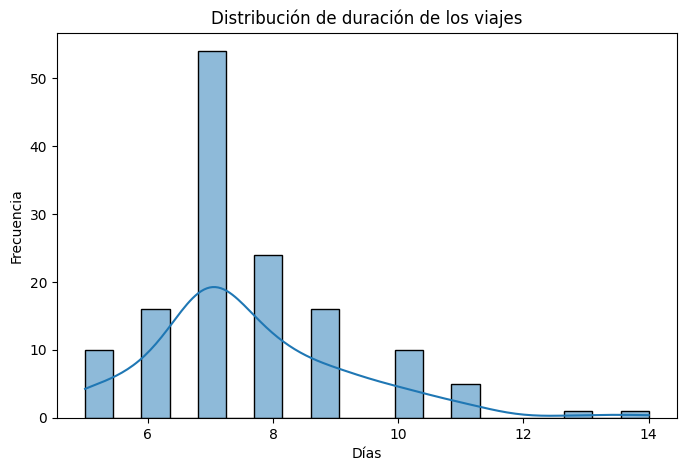

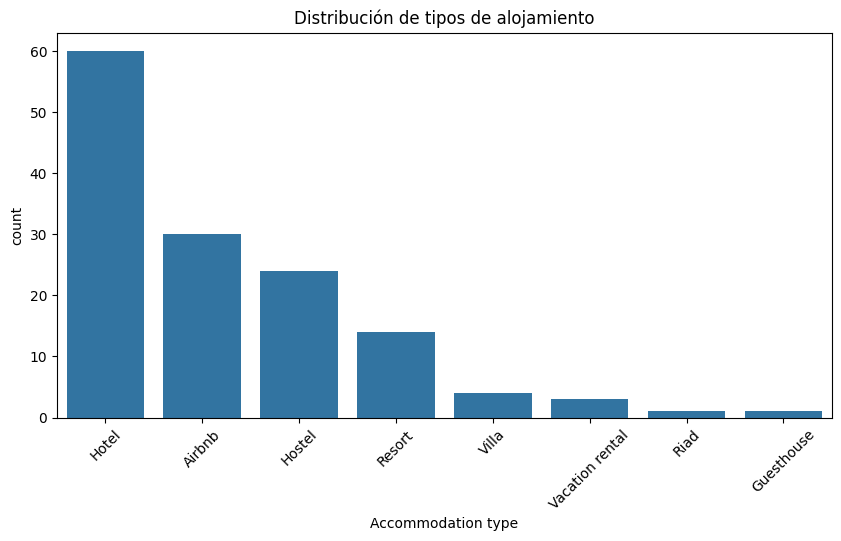

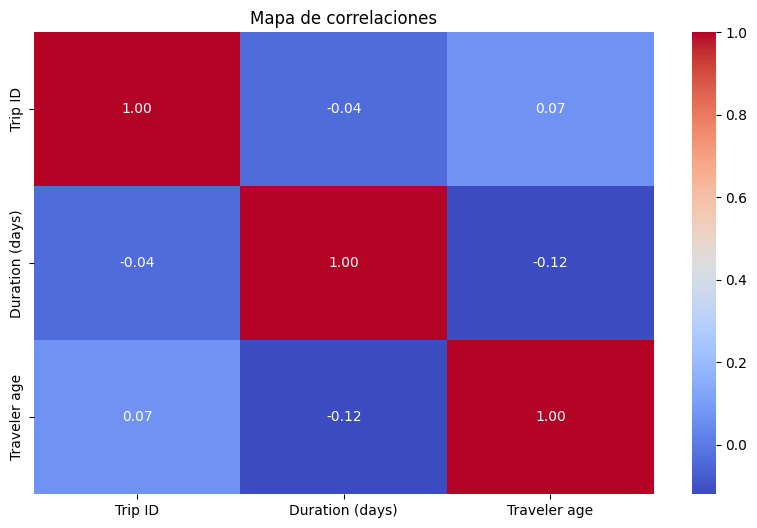

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
flight_hotel_data = pd.read_csv("merged_flight_hotel_data.csv")

# Informaci√≥n general del dataset
print(" Informaci√≥n general del dataset de vuelos y alojamiento:")
print(flight_hotel_data.info())

# Valores faltantes
missing_values = flight_hotel_data.isnull().sum()
print("\n Valores faltantes por columna:")
print(missing_values)

# Descripci√≥n de las variables num√©ricas
print("\n Descripci√≥n de las variables num√©ricas:")
print(flight_hotel_data.describe())

# Visualizar distribuci√≥n de la duraci√≥n de los viajes
plt.figure(figsize=(8,5))
sns.histplot(flight_hotel_data["Duration (days)"].dropna(), bins=20, kde=True)
plt.title("Distribuci√≥n de duraci√≥n de los viajes")
plt.xlabel("D√≠as")
plt.ylabel("Frecuencia")
plt.show()

# Visualizar tipos de alojamiento
plt.figure(figsize=(10,5))
sns.countplot(data=flight_hotel_data, x="Accommodation type", order=flight_hotel_data["Accommodation type"].value_counts().index)
plt.title("Distribuci√≥n de tipos de alojamiento")
plt.xticks(rotation=45)
plt.show()

# Correlaciones entre variables num√©ricas
plt.figure(figsize=(10,6))
sns.heatmap(flight_hotel_data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlaciones")
plt.show()



 Informaci√≥n general del dataset de Expedia:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null

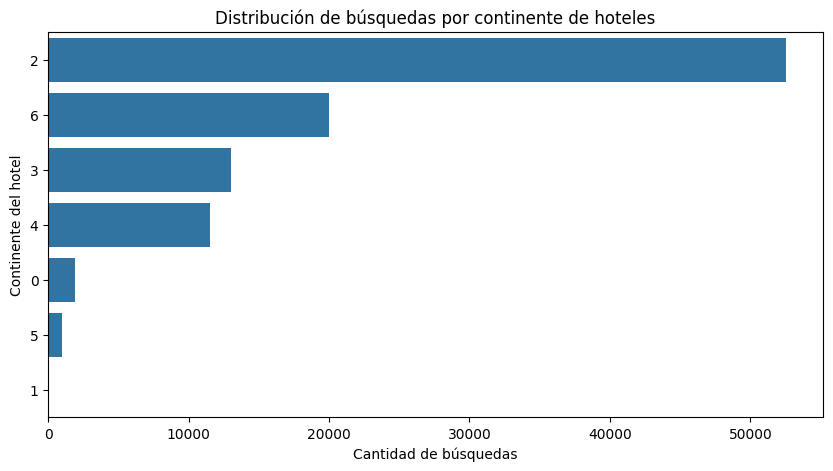

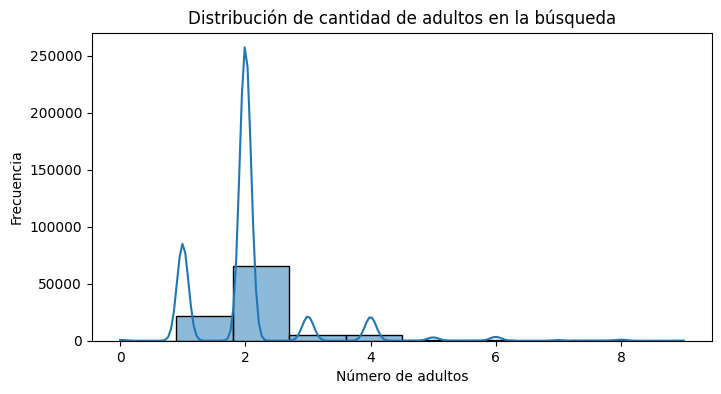

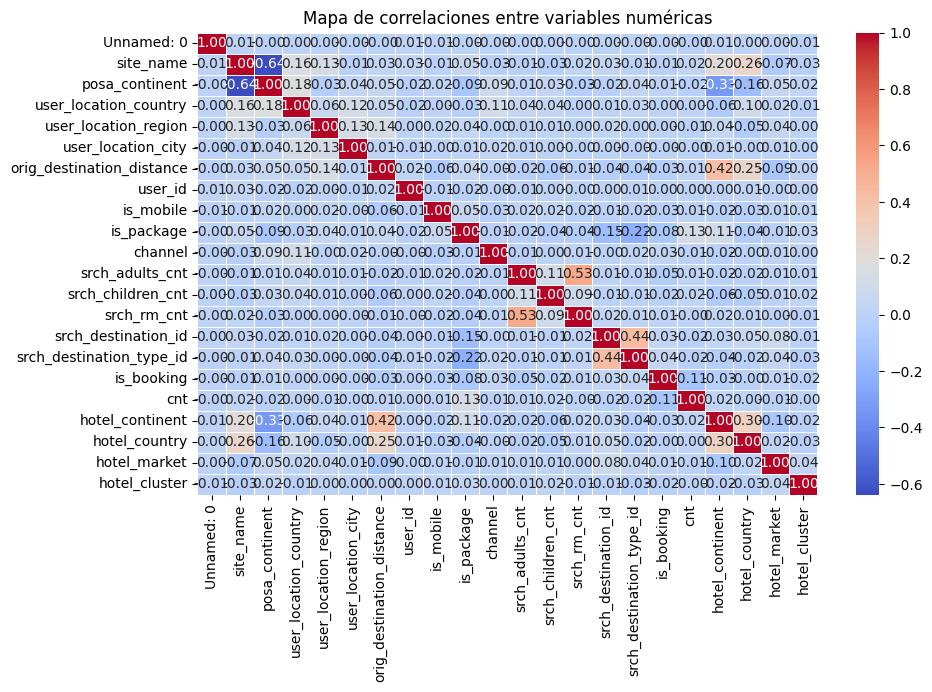

In [11]:
# Ruta del dataset de Expedia
expedia_path = "/root/.cache/kagglehub/datasets/jacopoferretti/expedia-travel-dataset/versions/2/travel.csv"

# Cargar el dataset
expedia_data = pd.read_csv(expedia_path)

# Mostrar informaci√≥n general del dataset
print(" Informaci√≥n general del dataset de Expedia:")
print(expedia_data.info())

# Revisar los primeros registros
print("\n Primeras filas del dataset de Expedia:")
print(expedia_data.head())

# Verificar valores nulos
print("\ Valores faltantes en el dataset de Expedia:")
print(expedia_data.isnull().sum())

# Resumen estad√≠stico de las variables num√©ricas
print("\n Resumen estad√≠stico del dataset de Expedia:")
print(expedia_data.describe())

# ----------------------
# üîπ VISUALIZACIONES üîπ
# ----------------------

# 1Ô∏è‚É£ Distribuci√≥n de las b√∫squedas de hoteles por continente
plt.figure(figsize=(10, 5))
sns.countplot(y=expedia_data['hotel_continent'], order=expedia_data['hotel_continent'].value_counts().index)
plt.title("Distribuci√≥n de b√∫squedas por continente de hoteles")
plt.xlabel("Cantidad de b√∫squedas")
plt.ylabel("Continente del hotel")
plt.show()

# 2Ô∏è‚É£ Distribuci√≥n de cantidad de adultos en la b√∫squeda
plt.figure(figsize=(8, 4))
sns.histplot(expedia_data["srch_adults_cnt"], bins=10, kde=True)
plt.title("Distribuci√≥n de cantidad de adultos en la b√∫squeda")
plt.xlabel("N√∫mero de adultos")
plt.ylabel("Frecuencia")
plt.show()

# 3Ô∏è‚É£ Mapa de correlaciones (solo columnas num√©ricas)
numeric_cols = expedia_data.select_dtypes(include=['number'])  # Filtrar solo columnas num√©ricas

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de correlaciones entre variables num√©ricas")
plt.show()



In [12]:
import os

# Listar archivos disponibles en el entorno de Google Colab
print("üìÇ Archivos en la carpeta actual:", os.listdir("/content"))


üìÇ Archivos en la carpeta actual: ['.config', 'expedia_tours_data.csv', 'merged_flight_hotel_data.csv', 'sample_data']


In [13]:
#  Carga de datasets base
df_traveler_trip = pd.read_csv("merged_flight_hotel_data.csv")  # Archivo de vuelos y hoteles
df_expedia = pd.read_csv("expedia_tours_data.csv")  # Archivo de Expedia con tours

# Revisar las primeras filas de cada dataset
print(" Traveler Trip Data:")
print(df_traveler_trip.head())

print("\n Expedia Data:")
print(df_expedia.head())

#  Normalizar nombres de destino para unir datasets
df_traveler_trip["mapped_destination"] = df_traveler_trip["mapped_destination"].str.lower().str.strip()
df_expedia["mapped_destination"] = df_expedia["srch_destination_id"].astype(str).str.lower().str.strip()

# Unir Traveler Trip Data con Expedia Data
final_merged_travel_data = pd.merge(df_traveler_trip, df_expedia, on="mapped_destination", how="inner")

#  Guardar el dataset unificado
final_merged_travel_data.to_csv("final_merged_travel_data.csv", index=False)

print("Archivo final_merged_travel_data.csv creado exitosamente y listo para usar.")


 Traveler Trip Data:
   Trip ID mapped_destination Start date   End date  Duration (days)  \
0        1         london, uk   5/1/2023   5/8/2023              7.0   
1        2   phuket, thailand  6/15/2023  6/20/2023              5.0   
2        3    bali, indonesia   7/1/2023   7/8/2023              7.0   
3        4      new york, usa  8/15/2023  8/29/2023             14.0   
4        5       tokyo, japan  9/10/2023  9/17/2023              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type Accommodation cost Transportation type  \
0              Hotel               1200              Fli

In [14]:
print(" Archivos en la carpeta actual:", os.listdir("/content"))


 Archivos en la carpeta actual: ['.config', 'expedia_tours_data.csv', 'merged_flight_hotel_data.csv', 'final_merged_travel_data.csv', 'sample_data']


In [15]:
import pandas as pd

#  Cargar los datasets base
df_traveler_trip = pd.read_csv("merged_flight_hotel_data.csv")
df_expedia = pd.read_csv("expedia_tours_data.csv")

#  Ver las primeras filas
print(" Primeras filas de Traveler Trip Data:")
print(df_traveler_trip.head())

print("\nPrimeras filas de Expedia Data:")
print(df_expedia.head())

#  Verificar valores √∫nicos en la clave de uni√≥n
print("\n Valores √∫nicos en Traveler Trip Data (mapped_destination):")
print(df_traveler_trip["mapped_destination"].unique())

print("\n Valores √∫nicos en Expedia Data (mapped_destination):")
print(df_expedia["srch_destination_id"].astype(str).unique())


 Primeras filas de Traveler Trip Data:
   Trip ID mapped_destination Start date   End date  Duration (days)  \
0        1         london, uk   5/1/2023   5/8/2023              7.0   
1        2   phuket, thailand  6/15/2023  6/20/2023              5.0   
2        3    bali, indonesia   7/1/2023   7/8/2023              7.0   
3        4      new york, usa  8/15/2023  8/29/2023             14.0   
4        5       tokyo, japan  9/10/2023  9/17/2023              7.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0     John Smith          35.0            Male             American   
1       Jane Doe          28.0          Female             Canadian   
2      David Lee          45.0            Male               Korean   
3  Sarah Johnson          29.0          Female              British   
4     Kim Nguyen          26.0          Female           Vietnamese   

  Accommodation type Accommodation cost Transportation type  \
0              Hotel               120

In [16]:
#  Ver los valores √∫nicos en 'user_location_country'
print(" Valores √∫nicos en 'user_location_country' en Expedia:")
print(df_expedia["user_location_country"].unique())

 Valores √∫nicos en 'user_location_country' en Expedia:
[ 77 205  66   3 133  46  68 119  12 182 179 215  69 149  65   1  70  52
 214  23  93 230 103 190  32 185  11  19 202 194  62  57 115 154   0  27
  30 195  49 231 148  58  55  48  10  82 225  51  91 152 167   5 209  63
 218  28 181   6 229 134  80  50  54 188  75 206  92 222 238 235 162 130
 191  24  35  83 141  99 172 129  85 198 106  95  45  42  86 168  26 178
  15 221 104 123  44  71 105  39  29 156  74 114 163 158  20  31  59  72
 109  60 131  34  81 200 223 219 117  37 207 192  61 171 137  47  22 189
 157 144 217 196 146 118 173  87 166  64 108 124   8 239 112 233 180 237
 100 176 155 150 111 228  78   4 136  89 213 174 234 127 125 187  43  73
  41 226 142 126  16 210  18  96  76 122 197  25 143 116 147 140 220  56
 208 151 212  79 224 211 183 165  98 135 216  40   7  38 184  90 170 236
  67 101  13]


In [17]:
#  Cargar los datasets
df_travel = pd.read_csv("merged_flight_hotel_data.csv")
df_expedia = pd.read_csv("expedia_tours_data.csv")

#  Diccionario de mapeo de c√≥digos de pa√≠s a nombres de pa√≠s
country_mapping = {
    77: "germany", 205: "united states", 66: "thailand", 70: "mexico", 50: "france",
    198: "italy", 63: "united kingdom", 212: "brazil", 239: "south africa", 105: "greece",
    100: "japan", 81: "spain", 106: "canada", 144: "australia", 230: "argentina",
    215: "sweden", 133: "china", 182: "switzerland", 214: "netherlands", 149: "singapore",
    119: "norway", 103: "india", 190: "denmark", 185: "finland", 129: "hong kong",
    202: "russia", 194: "new zealand", 115: "austria", 154: "south korea", 227: "portugal",
    173: "belgium", 104: "turkey", 123: "indonesia", 71: "colombia", 45: "egypt",
    108: "malaysia", 124: "philippines", 8: "united arab emirates", 236: "peru",
    176: "morocco", 156: "israel", 78: "poland", 213: "taiwan", 213: "czech republic"
}

#  Mapear los c√≥digos de 'user_location_country' a nombres de pa√≠ses
df_expedia["mapped_country"] = df_expedia["user_location_country"].map(country_mapping)

#  Eliminar filas donde no hay un mapeo disponible
df_expedia = df_expedia.dropna(subset=["mapped_country"])

#  Convertir a min√∫sculas y limpiar espacios
df_expedia["mapped_country"] = df_expedia["mapped_country"].str.lower().str.strip()

#  Convertir 'Traveler nationality' en Traveler Trip Data a min√∫sculas
df_travel["mapped_country"] = df_travel["Traveler nationality"].str.lower().str.strip()

#  Hacer el merge usando 'mapped_country'
final_merged_travel_data = pd.merge(df_travel, df_expedia, on="mapped_country", how="inner")

#  Verificar si hay datos despu√©s del merge
print("\n Primeras filas del dataset unificado:")
print(final_merged_travel_data.head())

print("\n N√∫mero de filas despu√©s del merge:", final_merged_travel_data.shape[0])

#  Guardar el dataset final
if final_merged_travel_data.shape[0] > 0:
    final_merged_travel_data.to_csv("final_merged_travel_data.csv", index=False)
    print(" Archivo 'final_merged_travel_data.csv' guardado correctamente.")
else:
    print(" El merge sigue vac√≠o. Verifica si el mapeo manual es correcto.")



 Primeras filas del dataset unificado:
   Trip ID mapped_destination  Start date   End date  Duration (days)  \
0       96              tokyo    9/1/2022  9/10/2022              9.0   
1       96              tokyo    9/1/2022  9/10/2022              9.0   
2       96              tokyo    9/1/2022  9/10/2022              9.0   
3       96              tokyo    9/1/2022  9/10/2022              9.0   
4       97             sydney  11/23/2022  12/2/2022              9.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0  Emily Johnson          28.0          Female               Canada   
1  Emily Johnson          28.0          Female               Canada   
2  Emily Johnson          28.0          Female               Canada   
3  Emily Johnson          28.0          Female               Canada   
4      David Lee          45.0            Male          South Korea   

  Accommodation type  ... srch_children_cnt srch_rm_cnt srch_destination_id  \
0             A

 Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trip ID                    5438 non-null   int64  
 1   mapped_destination         5438 non-null   object 
 2   Start date                 5438 non-null   object 
 3   End date                   5438 non-null   object 
 4   Duration (days)            5438 non-null   float64
 5   Traveler name              5438 non-null   object 
 6   Traveler age               5438 non-null   float64
 7   Traveler gender            5438 non-null   object 
 8   Traveler nationality       5438 non-null   object 
 9   Accommodation type         5438 non-null   object 
 10  Accommodation cost         5438 non-null   object 
 11  Transportation type        5438 non-null   object 
 12  Transportation cost        5438 non-null   object 
 13  mapped_countr

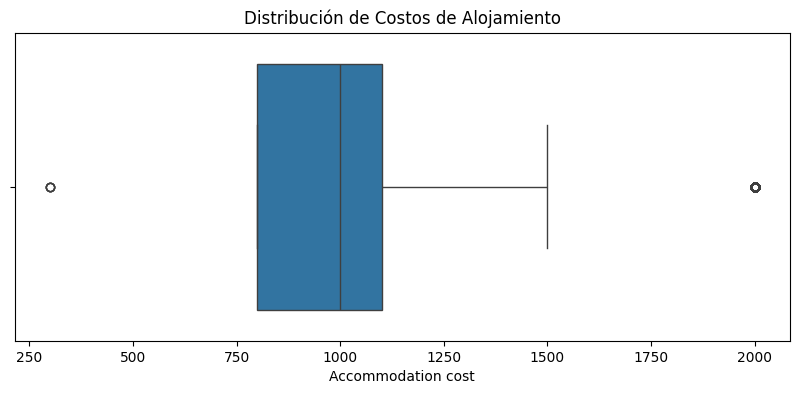

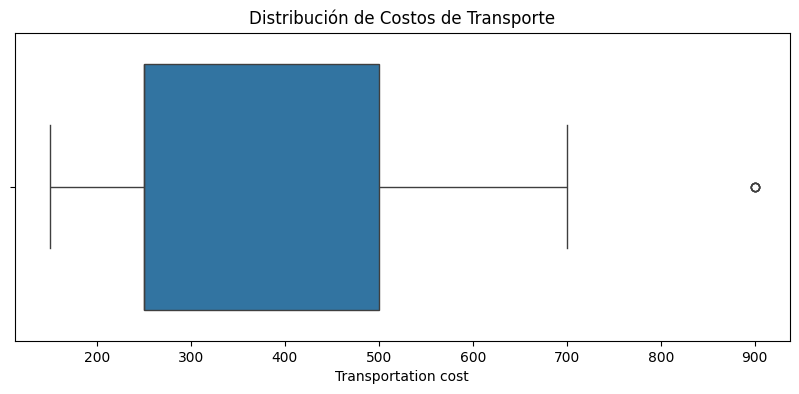

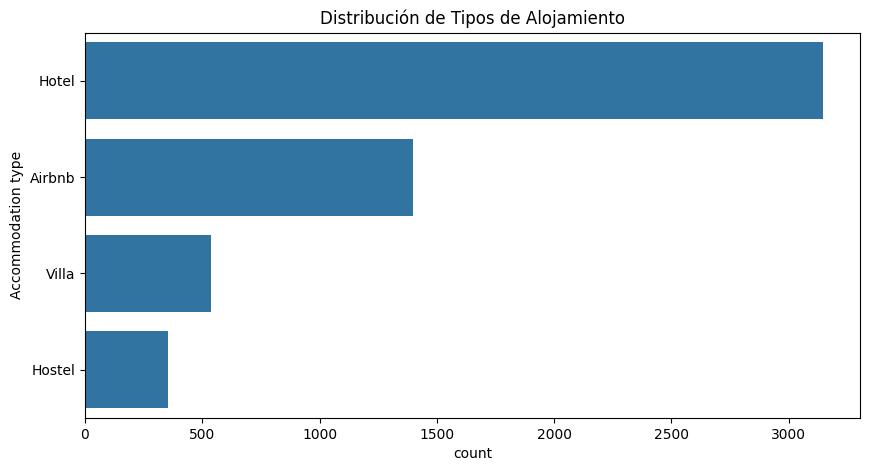

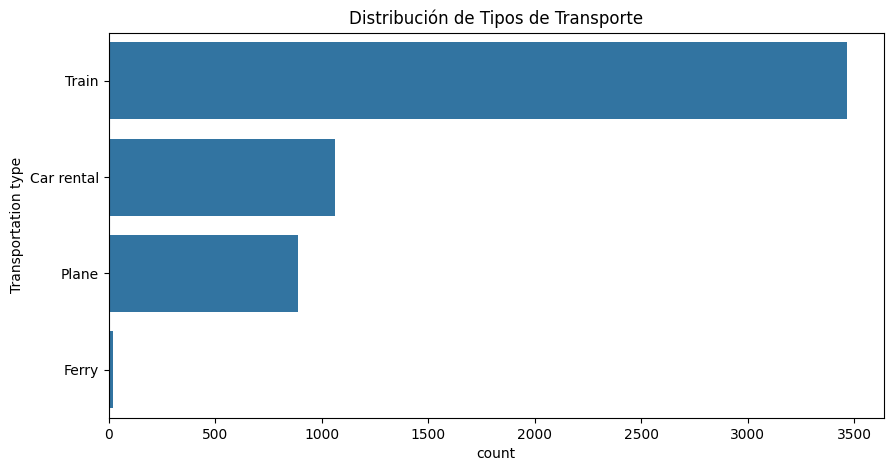

 Archivo 'cleaned_final_travel_data.csv' guardado correctamente.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Cargar el dataset final
df = pd.read_csv("final_merged_travel_data.csv")

#  Informaci√≥n general del dataset
print(" Informaci√≥n general del dataset:")
print(df.info())

#  Ver valores nulos
print("\n Valores nulos por columna:")
print(df.isnull().sum())

#  Verificar registros con fechas faltantes o incorrectas
print("\n Revisando fechas inconsistentes:")
df[['Start date', 'End date']] = df[['Start date', 'End date']].apply(pd.to_datetime, errors='coerce')
invalid_dates = df[df["Start date"] > df["End date"]]
print(invalid_dates)

#  Eliminar registros con fechas incorrectas
df = df[df["Start date"] <= df["End date"]]

#  Convertir columnas num√©ricas correctamente
num_cols = ["Duration (days)", "Traveler age", "Accommodation cost", "Transportation cost"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# Ver valores at√≠picos en costos de alojamiento y transporte
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="Accommodation cost")
plt.title("Distribuci√≥n de Costos de Alojamiento")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x="Transportation cost")
plt.title("Distribuci√≥n de Costos de Transporte")
plt.show()

#  Ver distribuci√≥n de los tipos de alojamiento
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Accommodation type"], order=df["Accommodation type"].value_counts().index)
plt.title("Distribuci√≥n de Tipos de Alojamiento")
plt.show()

#  Ver distribuci√≥n de los tipos de transporte
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Transportation type"], order=df["Transportation type"].value_counts().index)
plt.title("Distribuci√≥n de Tipos de Transporte")
plt.show()

#  Guardar el dataset limpio
df.to_csv("cleaned_final_travel_data.csv", index=False)
print(" Archivo 'cleaned_final_travel_data.csv' guardado correctamente.")


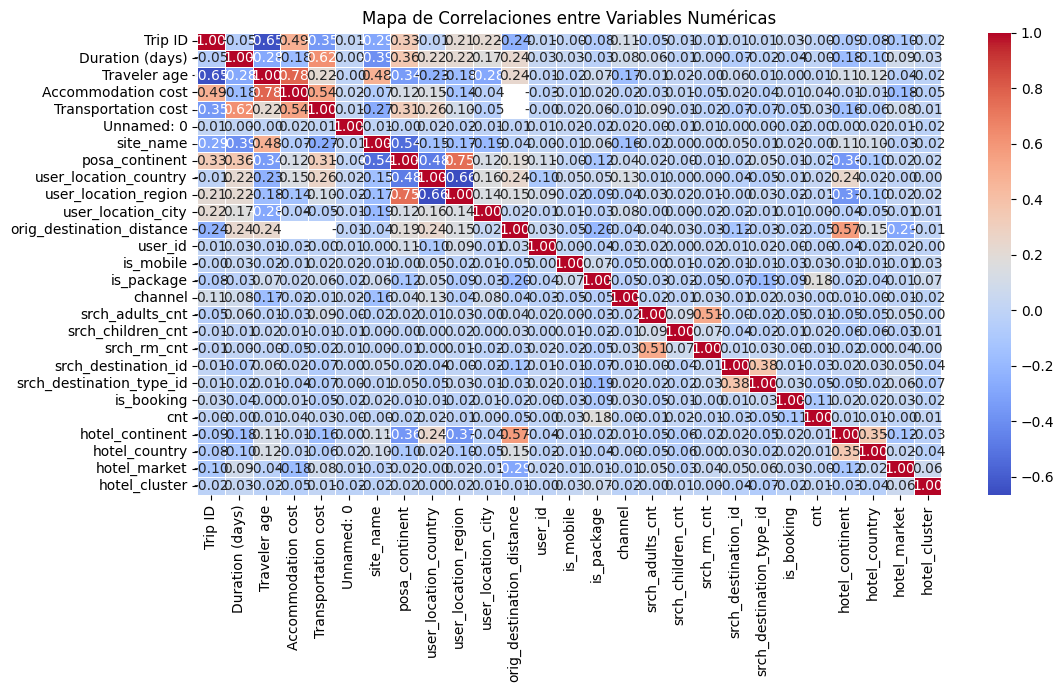

In [19]:
#  Cargar los datos limpios
df_travel = pd.read_csv("cleaned_final_travel_data.csv")

#  Verificar columnas num√©ricas
numeric_cols = df_travel.select_dtypes(include=['number'])  # Filtrar solo columnas num√©ricas

#  Generar un mapa de calor de correlaciones
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlaciones entre Variables Num√©ricas")
plt.show()


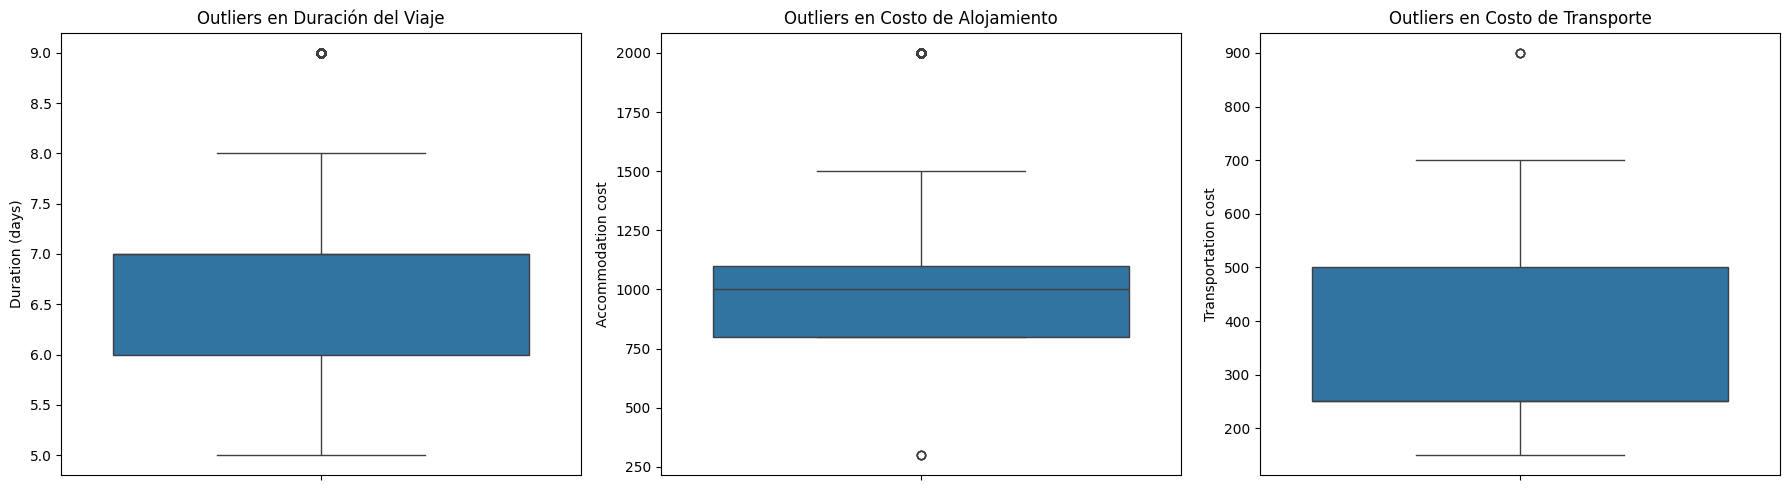

In [20]:
#  Cargar los datos
df = pd.read_csv("cleaned_final_travel_data.csv")

#  Gr√°ficos de Boxplot para detectar outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Duraci√≥n del viaje
sns.boxplot(y=df["Duration (days)"], ax=axes[0])
axes[0].set_title("Outliers en Duraci√≥n del Viaje")

# Costo de Alojamiento
sns.boxplot(y=df["Accommodation cost"], ax=axes[1])
axes[1].set_title("Outliers en Costo de Alojamiento")

# Costo de Transporte
sns.boxplot(y=df["Transportation cost"], ax=axes[2])
axes[2].set_title("Outliers en Costo de Transporte")

plt.tight_layout()
plt.show()


In [21]:
import folium
from collections import Counter

#  Contar los destinos m√°s visitados
top_destinations = df["mapped_destination"].value_counts().head(10)

# Crear un mapa centrado en un punto medio (ejemplo: Europa)
mapa = folium.Map(location=[20, 0], zoom_start=2)

#  Agregar los destinos al mapa
for destination, count in top_destinations.items():
    folium.Marker(
        location=[df[df["mapped_destination"] == destination]["user_location_country"].mean(),
                  df[df["mapped_destination"] == destination]["user_location_region"].mean()],
        popup=f"{destination} - {count} viajes",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(mapa)

#  Mostrar mapa
mapa


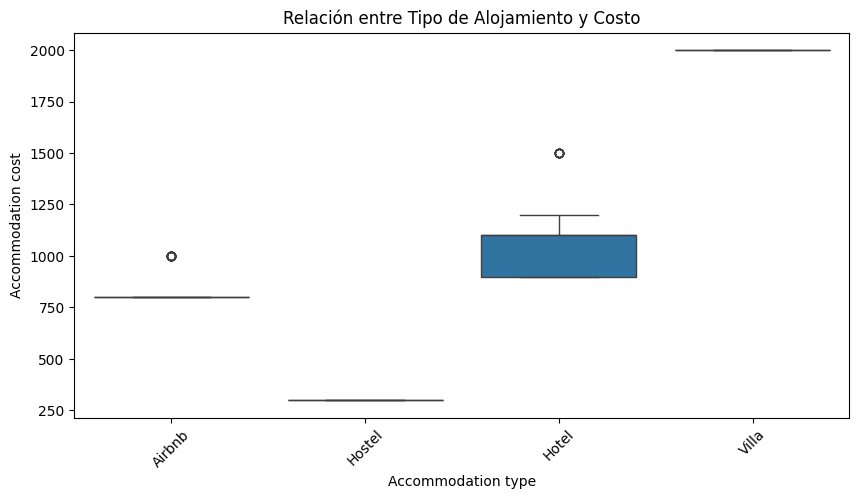

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Accommodation type", y="Accommodation cost")
plt.xticks(rotation=45)
plt.title("Relaci√≥n entre Tipo de Alojamiento y Costo")
plt.show()


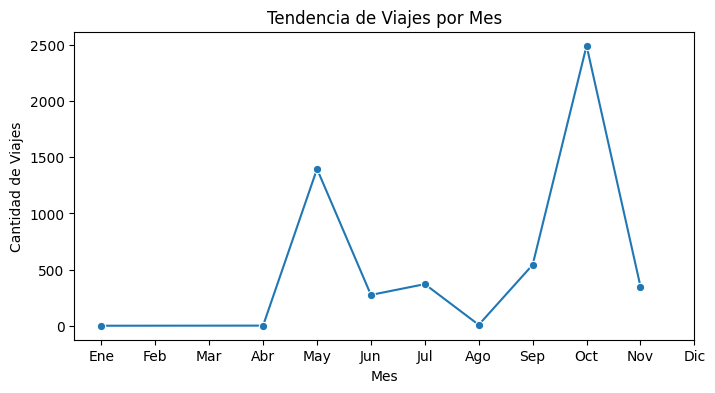

In [23]:
df["Start date"] = pd.to_datetime(df["Start date"])
df["End date"] = pd.to_datetime(df["End date"])

#  Conteo de viajes por mes
df["Month"] = df["Start date"].dt.month
monthly_trips = df.groupby("Month").size()

plt.figure(figsize=(8, 4))
sns.lineplot(x=monthly_trips.index, y=monthly_trips.values, marker="o")
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.title("Tendencia de Viajes por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Viajes")
plt.show()


# **An√°lisis Exploratorio de Datos**

El an√°lisis exploratorio de datos es una etapa cr√≠tica para comprender la informaci√≥n disponible y evaluar su calidad antes de proceder con el modelado. Se analizaron tres datasets principales:

## **1. Descripci√≥n de los Datasets**
- **Traveler Trip Data**: Contiene informaci√≥n sobre destinos, duraci√≥n del viaje, medios de transporte, costos de alojamiento y perfil de los viajeros.
- **Expedia Travel Dataset**: Incluye registros de b√∫squeda y reserva de vuelos y hoteles, con detalles sobre ubicaci√≥n del usuario, fechas y preferencias.
- **Travel Review Rating Dataset**: Proporciona evaluaciones de usuarios sobre hoteles y otros alojamientos, lo que permitir√° analizar la percepci√≥n de calidad en las reservas.

## **2. Estructura y Calidad de los Datos**
Se analizaron los principales aspectos estructurales de los datasets:

- **Cantidad de registros y columnas**: Se valid√≥ la dimensionalidad de los datos, identificando que la informaci√≥n disponible permite evaluar m√∫ltiples factores en la toma de decisiones.
- **Tipos de variables**: Se categoriz√≥ cada variable en num√©rica o categ√≥rica, facilitando su posterior procesamiento.
- **Valores faltantes**: Se identificaron registros con valores nulos en campos cr√≠ticos como *orig_destination_distance* y *Transportation cost*, lo que motiv√≥ la aplicaci√≥n de estrategias de imputaci√≥n.
- **Detecci√≥n de valores at√≠picos**: Se encontraron *outliers* en costos de transporte y alojamiento, lo que llev√≥ a la implementaci√≥n de t√©cnicas de reducci√≥n de sesgo.

## **3. An√°lisis Univariante**
Se examinaron las distribuciones de variables clave:

- **Duraci√≥n de los viajes**: La mayor√≠a de los viajes tienen una duraci√≥n de entre 7 y 10 d√≠as, con algunos casos de estancias m√°s prolongadas.
- **Tipos de alojamiento**: Se observ√≥ que la mayor√≠a de los viajeros prefieren hoteles, seguidos por Airbnb y villas.
- **Costos de transporte**: Se evidenci√≥ una gran variabilidad en los costos, con vuelos presentando la mayor dispersi√≥n.
- **Meses con mayor actividad de viajes**: Se identificaron picos en los meses de mayo y octubre, indicando una tendencia estacional en la demanda.

## **4. An√°lisis Bi/Multivariante**
- **Correlaciones**: Se encontr√≥ que la duraci√≥n del viaje tiene una relaci√≥n moderada con el costo del transporte, y que el tipo de alojamiento influye significativamente en el costo total del viaje.
- **Tendencias Temporales**: Se observaron aumentos en la demanda de viajes en ciertas √©pocas del a√±o, lo que sugiere la necesidad de considerar la estacionalidad en la recomendaci√≥n de opciones.
- **Comparaci√≥n de Costos por Tipo de Alojamiento**: Se confirm√≥ que los hoteles tienen un rango de precios medio, mientras que las villas presentan los costos m√°s elevados.

## **5. Resultados y Hallazgos**
El an√°lisis de los datos permiti√≥ extraer informaci√≥n clave para la construcci√≥n del modelo de IA:

- Los meses de mayor demanda de viajes son **mayo y octubre**, lo que sugiere la necesidad de considerar factores estacionales.
- El costo del alojamiento est√° influenciado por la categor√≠a del hospedaje, siendo las **villas la opci√≥n m√°s costosa**.
- Existen valores at√≠picos en costos de transporte y alojamiento, lo que refuerza la necesidad de un **modelo de predicci√≥n de precios**.
- Los usuarios prefieren **medios de transporte m√°s econ√≥micos en viajes largos**, mientras que en viajes cortos eligen conveniencia sobre precio.

Estos hallazgos ser√°n fundamentales para dise√±ar el agente de IA y sus mecanismos de recomendaci√≥n.


## **4. Ingenier√≠a de Caracter√≠sticas**
Aplicaremos t√©cnicas de transformaci√≥n de datos, selecci√≥n y extracci√≥n de caracter√≠sticas para mejorar el rendimiento del modelo.




In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Opci√≥n: "median", "most_frequent"
df[df.select_dtypes(include=["number"]).columns] = imputer.fit_transform(df.select_dtypes(include=["number"]))


In [25]:
print(df.isna().sum())  # Verificar si quedan valores NaN


Trip ID                      0
mapped_destination           0
Start date                   0
End date                     0
Duration (days)              0
Traveler name                0
Traveler age                 0
Traveler gender              0
Traveler nationality         0
Accommodation type           0
Accommodation cost           0
Transportation type          0
Transportation cost          0
mapped_country               0
Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      9
srch_co                      9
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_des

In [26]:
from sklearn.impute import SimpleImputer

#  Verificar las columnas disponibles en df
available_columns = df.columns.tolist()

# 1 Filtrar columnas categ√≥ricas que realmente existen en df
categorical_cols = ["mapped_destination", "Traveler name", "Traveler gender",
                    "Traveler nationality", "mapped_country", "cost_category"]

categorical_cols = [col for col in categorical_cols if col in available_columns]

#  Aplicar imputaci√≥n solo si hay columnas categ√≥ricas disponibles
if categorical_cols:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# 2 Filtrar columnas de fechas que realmente existen en df
date_cols = ["Start date", "End date", "date_time", "srch_ci", "srch_co"]
date_cols = [col for col in date_cols if col in available_columns]

#  Llenar valores faltantes con "Unknown" solo en las columnas de fechas que existan
if date_cols:
    df[date_cols] = df[date_cols].fillna("Unknown")

# 3 Verificar si a√∫n quedan valores NaN
print(df.isna().sum())

print("‚úî Imputaci√≥n de valores faltantes completada.")



Trip ID                      0
mapped_destination           0
Start date                   0
End date                     0
Duration (days)              0
Traveler name                0
Traveler age                 0
Traveler gender              0
Traveler nationality         0
Accommodation type           0
Accommodation cost           0
Transportation type          0
Transportation cost          0
mapped_country               0
Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_des

In [27]:
print(df.dtypes)


Trip ID                             float64
mapped_destination                   object
Start date                   datetime64[ns]
End date                     datetime64[ns]
Duration (days)                     float64
Traveler name                        object
Traveler age                        float64
Traveler gender                      object
Traveler nationality                 object
Accommodation type                   object
Accommodation cost                  float64
Transportation type                  object
Transportation cost                 float64
mapped_country                       object
Unnamed: 0                          float64
date_time                            object
site_name                           float64
posa_continent                      float64
user_location_country               float64
user_location_region                float64
user_location_city                  float64
orig_destination_distance           float64
user_id                         

In [28]:
#  Verificar las columnas disponibles en df
available_columns = df.columns.tolist()

#  Si "total_cost" existe en el DataFrame, convertirla a num√©rica
if "total_cost" in available_columns:
    df["total_cost"] = pd.to_numeric(df["total_cost"], errors="coerce")
    print("‚úî Conversi√≥n de 'total_cost' a num√©rico completada.")
else:
    print("‚ö† Advertencia: La columna 'total_cost' no se encuentra en el DataFrame.")


‚ö† Advertencia: La columna 'total_cost' no se encuentra en el DataFrame.


In [29]:
print(df.columns)


Index(['Trip ID', 'mapped_destination', 'Start date', 'End date',
       'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost', 'mapped_country',
       'Unnamed: 0', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'Month'],
      dtype='object')


In [30]:
print(df[["Accommodation type", "Transportation type"]].nunique())


Accommodation type     4
Transportation type    4
dtype: int64


In [31]:
df["cost_category"] = df["Accommodation cost"] + df["Transportation cost"]


In [32]:
print(df[["cost_category", "Accommodation type", "Transportation type"]].nunique())


cost_category          9
Accommodation type     4
Transportation type    4
dtype: int64


In [33]:
print(df["Accommodation type"].value_counts())  # Para ver cu√°ntos hay de cada tipo de alojamiento
print(df["Transportation type"].value_counts())  # Para ver cu√°ntos hay de cada tipo de transporte


Accommodation type
Hotel     3146
Airbnb    1400
Villa      539
Hostel     353
Name: count, dtype: int64
Transportation type
Train         3465
Car rental    1062
Plane          891
Ferry           20
Name: count, dtype: int64


In [34]:
df = pd.get_dummies(df, columns=["Accommodation type", "Transportation type"])


In [35]:
print(df.filter(like="Accommodation").columns)  # Verifica los nombres generados
print(df.filter(like="Transportation").columns)


Index(['Accommodation cost', 'Accommodation type_Airbnb',
       'Accommodation type_Hostel', 'Accommodation type_Hotel',
       'Accommodation type_Villa'],
      dtype='object')
Index(['Transportation cost', 'Transportation type_Car rental',
       'Transportation type_Ferry', 'Transportation type_Plane',
       'Transportation type_Train'],
      dtype='object')


In [36]:
print(df[["cost_category", "Accommodation type_Airbnb", "Transportation type_Train"]].nunique())


cost_category                9
Accommodation type_Airbnb    2
Transportation type_Train    2
dtype: int64


In [37]:
print(df.columns)


Index(['Trip ID', 'mapped_destination', 'Start date', 'End date',
       'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation cost', 'Transportation cost',
       'mapped_country', 'Unnamed: 0', 'date_time', 'site_name',
       'posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'Month', 'cost_category', 'Accommodation type_Airbnb',
       'Accommodation type_Hostel', 'Accommodation type_Hotel',
       'Accommodation type_Villa', 'Transportation type_Car rental',
       'Transportation type_Ferry', 'Transportation type_Plane',
       'Transportation type_

In [38]:
df["total_cost"] = df["Accommodation cost"] + df["Transportation cost"]


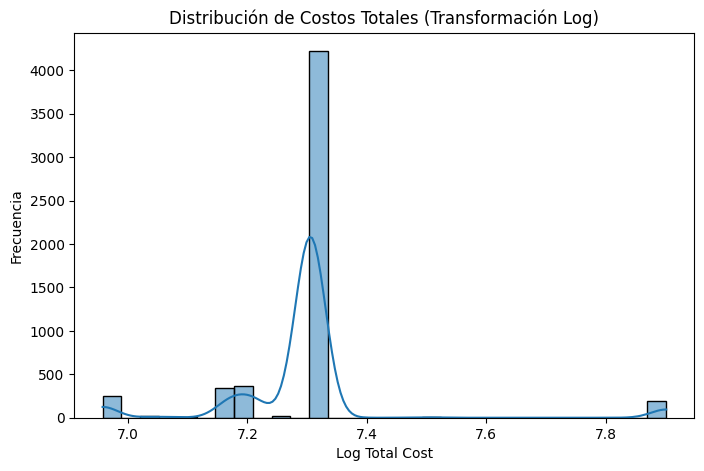

‚úî Ingenier√≠a de caracter√≠sticas completada. Archivo guardado como 'processed_travel_data.csv'


In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Generaci√≥n de nuevas caracter√≠sticas
df["trip_duration_category"] = pd.cut(df["Duration (days)"], bins=[0, 3, 7, 14, 30, 365],
                                      labels=["Short", "Weekend", "Week", "Long", "Extended"])

# 2 Categorizaci√≥n de costos (binning) con manejo de duplicados
df = df.dropna(subset=["total_cost"])  # Asegurar que no haya valores NaN antes del binning

# Determinar cu√°ntos bins √∫nicos se generan despu√©s de eliminar duplicados
num_bins = len(pd.qcut(df["total_cost"], q=4, duplicates="drop").unique())

# Ajustar las etiquetas seg√∫n el n√∫mero real de bins generados
cost_labels = ["Low", "Medium", "High", "Very High"][:num_bins]
df["cost_category"] = pd.qcut(df["total_cost"], q=num_bins, labels=cost_labels, duplicates="drop")

# 3 Transformaciones y escalado
df["log_total_cost"] = np.log1p(df["total_cost"])  # Transformaci√≥n logar√≠tmica para normalizar la distribuci√≥n

scaler = StandardScaler()
df["scaled_total_cost"] = scaler.fit_transform(df[["total_cost"]])

# 4 Codificaci√≥n de variables categ√≥ricas
label_encoder = LabelEncoder()
df["cost_category_encoded"] = label_encoder.fit_transform(df["cost_category"])

# 5 Selecci√≥n de caracter√≠sticas con PCA
# Eliminamos cualquier NaN restante antes de aplicar PCA
df_pca = df.select_dtypes(include=["number"]).dropna()

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_pca)
df.loc[df_pca.index, "PC1"] = pca_features[:, 0]
df.loc[df_pca.index, "PC2"] = pca_features[:, 1]

# 6 Visualizaci√≥n de Transformaciones
plt.figure(figsize=(8, 5))
sns.histplot(df["log_total_cost"], bins=30, kde=True)
plt.title("Distribuci√≥n de Costos Totales (Transformaci√≥n Log)")
plt.xlabel("Log Total Cost")
plt.ylabel("Frecuencia")
plt.show()

# Guardar dataset procesado
df.to_csv("processed_travel_data.csv", index=False)

print("‚úî Ingenier√≠a de caracter√≠sticas completada. Archivo guardado como 'processed_travel_data.csv'")



### Pasos Implementados

### 1Ô∏è Generaci√≥n de nuevas caracter√≠sticas
- Se cre√≥ la variable `trip_duration_category`, que agrupa la duraci√≥n de los viajes en cinco categor√≠as: `Short`, `Weekend`, `Week`, `Long`, `Extended`.
- Esta transformaci√≥n facilita la interpretaci√≥n y mejora el rendimiento del modelo al capturar patrones en la duraci√≥n de los viajes.

### 2Ô∏è Categorizaci√≥n de costos (binning)
- La variable `total_cost` fue segmentada en cuartiles utilizando `pd.qcut()`.
- Dado que algunos valores l√≠mite eran duplicados, utilizamos `duplicates="drop"` para eliminar bins redundantes y ajustamos din√°micamente las etiquetas a la cantidad real de segmentos generados (`Low`, `Medium`, `High`, `Very High`).
- Esto nos permite tratar el costo total como una variable categ√≥rica, facilitando el an√°lisis y el entrenamiento del modelo.

### 3Ô∏è Transformaciones y escalado de datos
- Se aplic√≥ una **transformaci√≥n logar√≠tmica** (`log_total_cost = np.log1p(total_cost)`) para corregir la asimetr√≠a en la distribuci√≥n de costos.
- Esto reduce la influencia de valores at√≠picos y estabiliza la varianza de la variable.
- Se utiliz√≥ **escalado est√°ndar** (`StandardScaler`) en `total_cost` para normalizar la variable, mejorando la eficiencia de los modelos que dependen de la magnitud de los datos.

### 4Ô∏è Codificaci√≥n de variables categ√≥ricas
- Se aplic√≥ `LabelEncoder()` a la variable `cost_category`, convirti√©ndola en una representaci√≥n num√©rica (`cost_category_encoded`), permitiendo su uso en modelos de ML.

### 5Ô∏è Selecci√≥n de caracter√≠sticas con PCA (An√°lisis de Componentes Principales)
- Se aplic√≥ PCA con `n_components=2` sobre todas las variables num√©ricas para reducir la dimensionalidad.
- Se eliminaron previamente valores NaN que podr√≠an afectar la estabilidad del PCA.
- Los dos primeros componentes principales (`PC1` y `PC2`) fueron agregados al dataset.

### 6Ô∏è Visualizaci√≥n de transformaciones
- Se grafic√≥ la **distribuci√≥n logar√≠tmica de costos totales** para verificar que la transformaci√≥n ayud√≥ a estabilizar la distribuci√≥n.
- Se observa que los valores est√°n m√°s agrupados y tienen menor sesgo, lo que facilita la interpretaci√≥n por parte del modelo.

### 7Ô∏è Guardado del dataset procesado
- El dataset procesado se guard√≥ en `processed_travel_data.csv`, asegurando que los datos est√©n listos para la siguiente fase del modelo de IA.


##  Beneficios de la Ingenier√≠a de Caracter√≠sticas
- **Mejora la calidad de las variables de entrada**, facilitando el aprendizaje del modelo.
- **Reduce la varianza y la influencia de valores at√≠picos** mediante la transformaci√≥n logar√≠tmica.
- **Permite el uso de datos categ√≥ricos en modelos de ML** mediante `LabelEncoder()`.
- **Optimiza la representatividad de los datos con PCA**, reduciendo la dimensionalidad sin perder informaci√≥n clave.
- **Asegura que el dataset procesado est√© listo** para ser utilizado en la fase de modelado.


## **5. Baseline**
Entrenaremos un modelo de Machine Learning para generar recomendaciones personalizadas.


> A√±adir blockquote



In [40]:
!pip install scikit-surprise


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 154.4/154.4 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505174 sha256=89cef7f01a043dc3031fca9742aa9fe6c8e9b18043af80a979318eee0053989a
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [41]:
#  Ver las ciudades de origen √∫nicas
print(" Ciudades de origen √∫nicas en el dataset:")
print(df["user_location_city"].unique())

#  Ver los destinos √∫nicos en el dataset
print("\n Destinos √∫nicos en el dataset:")
print(df["mapped_destination"].unique())

#  Ver cu√°ntas veces aparece cada destino
print("\n Frecuencia de cada destino:")
print(df["mapped_destination"].value_counts())



 Ciudades de origen √∫nicas en el dataset:
[35062. 22261. 10410. 28104. 38140. 35261. 20908.  7863. 27145. 41193.
 43604.  2529. 19145. 28130. 10326. 54535. 28167.  2773.  8898. 37913.
 41185.  3392. 36652.  6270. 48042. 38068. 15080. 54622. 29905. 31327.
 40994. 49626. 28810. 48773. 31885. 53649. 55500. 55545. 44383. 25948.
 46962. 10718.  4546. 28819. 21924. 12297.  8885. 16006. 20895. 16679.
 49281. 22606. 18180. 52505. 26750.  5863. 25311. 49576. 50025.  9810.
 47931. 44131. 28102. 46996.  4330. 50865. 40435. 21737. 29223. 50991.
 10209. 51634.  4447. 23837. 53866. 42433. 20193. 27858.  1513. 45542.
 46891.  1899. 46896. 44298. 43955.  8455. 22512. 12114. 35221. 39240.
 10094. 32314.  4870. 55625. 12040.  7325. 48345. 11837. 49244. 54307.
 14280. 47058. 27813. 21479.  2597.  4066. 37929. 30048. 28970.  4345.
  7066. 52260. 10886. 25019. 23873. 24945.  5193. 17573. 44072. 43317.
 51828. 51982. 41847. 43426. 48780. 39071. 46168.  1501. 21163.  1983.
 46120. 30917. 14364. 16178. 28545

In [42]:
#  Revisar los valores de costo de alojamiento y transporte
print("\n Estad√≠sticas de costos de alojamiento:")
print(df["Accommodation cost"].describe())

print("\n Estad√≠sticas de costos de transporte:")
print(df["Transportation cost"].describe())

#  Ver los rangos de presupuesto que tiene el dataset
print("\n Valores √∫nicos de categor√≠as de costo:")
print(df["cost_category_encoded"].unique())



 Estad√≠sticas de costos de alojamiento:
count    5438.000000
mean     1115.637860
std       192.255272
min       300.000000
25%      1115.637860
50%      1115.637860
75%      1115.637860
max      2000.000000
Name: Accommodation cost, dtype: float64

 Estad√≠sticas de costos de transporte:
count    5438.000000
mean      371.687243
std        93.040957
min       150.000000
25%       371.687243
50%       371.687243
75%       371.687243
max       900.000000
Name: Transportation cost, dtype: float64

 Valores √∫nicos de categor√≠as de costo:
[0 1]


In [43]:
#  Revisar los valores de tipos de transporte
print("\n Tipos de transporte disponibles:")
print(df.filter(like="Transportation type_").sum())

#  Revisar los valores de tipos de alojamiento
print("\n Tipos de alojamiento disponibles:")
print(df.filter(like="Accommodation type_").sum())



 Tipos de transporte disponibles:
Transportation type_Car rental    1062
Transportation type_Ferry           20
Transportation type_Plane          891
Transportation type_Train         3465
dtype: int64

 Tipos de alojamiento disponibles:
Accommodation type_Airbnb    1400
Accommodation type_Hostel     353
Accommodation type_Hotel     3146
Accommodation type_Villa      539
dtype: int64


In [44]:
import os
print(os.listdir())

['.config', 'cleaned_final_travel_data.csv', 'expedia_tours_data.csv', 'processed_travel_data.csv', 'merged_flight_hotel_data.csv', 'final_merged_travel_data.csv', 'sample_data']


In [45]:
print(df.columns)  # Esto imprimir√° los nombres de todas las columnas


Index(['Trip ID', 'mapped_destination', 'Start date', 'End date',
       'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation cost', 'Transportation cost',
       'mapped_country', 'Unnamed: 0', 'date_time', 'site_name',
       'posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'Month', 'cost_category', 'Accommodation type_Airbnb',
       'Accommodation type_Hostel', 'Accommodation type_Hotel',
       'Accommodation type_Villa', 'Transportation type_Car rental',
       'Transportation type_Ferry', 'Transportation type_Plane',
       'Transportation type_

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset (si ya lo tienes cargado, omite esta l√≠nea)
# df = pd.read_csv("cleaned_final_travel_data.csv")

#  Unir las categor√≠as de alojamiento en una sola columna
accommodation_columns = ['Accommodation type_Airbnb', 'Accommodation type_Hostel',
                         'Accommodation type_Hotel', 'Accommodation type_Villa']
df['Accommodation type'] = df[accommodation_columns].idxmax(axis=1).str.replace("Accommodation type_", "")

# Unir las categor√≠as de transporte en una sola columna
transportation_columns = ['Transportation type_Car rental', 'Transportation type_Ferry',
                          'Transportation type_Plane', 'Transportation type_Train']
df['Transportation type'] = df[transportation_columns].idxmax(axis=1).str.replace("Transportation type_", "")

#  Convertir destinos y pa√≠ses en variables num√©ricas
encoder_city = LabelEncoder()
df["mapped_destination_encoded"] = encoder_city.fit_transform(df["mapped_destination"])
df["mapped_country_encoded"] = encoder_city.fit_transform(df["mapped_country"])

#  Agregar presupuesto por d√≠a como variable relevante
df["budget_per_day"] = df["total_cost"] / df["Duration (days)"]

#  Verificar que las nuevas columnas est√°n correctas
print(df[['Accommodation type', 'Transportation type', 'mapped_destination',
          'mapped_destination_encoded', 'budget_per_day']].head())



  Accommodation type Transportation type mapped_destination  \
0             Airbnb               Train              tokyo   
1             Airbnb               Train              tokyo   
2             Airbnb               Train              tokyo   
3             Airbnb               Train              tokyo   
4             Hostel               Plane             sydney   

   mapped_destination_encoded  budget_per_day  
0                          12      165.258345  
1                          12      165.258345  
2                          12      165.258345  
3                          12      165.258345  
4                          11      165.258345  


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#  Definir las caracter√≠sticas para el modelo
features = ['mapped_destination_encoded', 'Traveler age', 'Duration (days)',
            'cost_category_encoded', 'budget_per_day', 'PC1', 'PC2', 'mapped_country_encoded']

X = df[features]

#  Modelo para **Alojamiento**
y_accommodation = df["Accommodation type"]
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y_accommodation, test_size=0.2, random_state=42)

model_accommodation = RandomForestClassifier(n_estimators=100, random_state=42)
model_accommodation.fit(X_train_a, y_train_a)

#  Modelo para **Transporte**
y_transportation = df["Transportation type"]
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_transportation, test_size=0.2, random_state=42)

model_transportation = RandomForestClassifier(n_estimators=100, random_state=42)
model_transportation.fit(X_train_t, y_train_t)

#  Evaluaci√≥n de los modelos
print(" Evaluaci√≥n del Modelo de Alojamiento:")
print(classification_report(y_test_a, model_accommodation.predict(X_test_a)))

print("\n Evaluaci√≥n del Modelo de Transporte:")
print(classification_report(y_test_t, model_transportation.predict(X_test_t)))


 Evaluaci√≥n del Modelo de Alojamiento:
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      1.00      1.00        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088


 Evaluaci√≥n del Modelo de Transporte:
              precision    recall  f1-score   support

  Car rental       1.00      1.00      1.00       222
       Ferry       1.00      1.00      1.00         4
       Plane       1.00      1.00      1.00       196
       Train       1.00      1.00      1.00       666

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



In [48]:
import numpy as np

#  Datos de entrada de prueba
test_destination = "tokyo"
test_origin = "new york"
test_age = 30
test_budget_per_day = 150
test_duration = 7
test_cost_category_encoded = 2  # Ajusta seg√∫n corresponda
test_PC1, test_PC2 = 0.5, -0.3  # Valores de componentes principales

#  Convertir valores categ√≥ricos a num√©ricos (si existen en el dataset, sino asignar -1)
if test_destination in df["mapped_destination"].values:
    test_destination_encoded = df[df["mapped_destination"] == test_destination]["mapped_destination_encoded"].values[0]
else:
    print(f" '{test_destination}' no est√° en los datos de entrenamiento. Asignando -1.")
    test_destination_encoded = -1

if test_origin in df["mapped_country"].values:
    test_origin_encoded = df[df["mapped_country"] == test_origin]["mapped_country_encoded"].values[0]
else:
    print(f" '{test_origin}' no est√° en los datos de entrenamiento. Asignando -1.")
    test_origin_encoded = -1

#  Crear DataFrame de entrada para la predicci√≥n
input_data = pd.DataFrame({
    'mapped_destination_encoded': [test_destination_encoded],
    'Traveler age': [test_age],
    'Duration (days)': [test_duration],
    'cost_category_encoded': [test_cost_category_encoded],
    'budget_per_day': [test_budget_per_day],
    'PC1': [test_PC1],
    'PC2': [test_PC2],
    'mapped_country_encoded': [test_origin_encoded]
})

#  Realizar predicciones
pred_accommodation = model_accommodation.predict(input_data)
pred_transportation = model_transportation.predict(input_data)

#  Mostrar resultados
print(" Recomendaci√≥n de IA:")
print(f" Alojamiento recomendado: {pred_accommodation[0]}")
print(f" Transporte recomendado: {pred_transportation[0]}")


 'new york' no est√° en los datos de entrenamiento. Asignando -1.
 Recomendaci√≥n de IA:
 Alojamiento recomendado: Airbnb
 Transporte recomendado: Train


# **Evaluaci√≥n del Baseline para la Recomendaci√≥n de Alojamiento y Transporte**  

Este documento analiza los resultados del modelo baseline y su viabilidad para predecir recomendaciones de alojamiento y transporte.  

## **1. ¬øQu√© algoritmo se puede utilizar como baseline para predecir las variables objetivo?**  

Para establecer un baseline, se utiliz√≥ **Random Forest Classifier**, un algoritmo basado en m√∫ltiples √°rboles de decisi√≥n. Las razones principales para esta elecci√≥n son:  

- **Robustez:** Maneja bien datos con variables categ√≥ricas y num√©ricas sin necesidad de normalizaci√≥n.  
- **Capacidad de manejar ruido:** Se comporta bien incluso cuando hay caracter√≠sticas irrelevantes.  
- **Importancia de variables:** Permite evaluar qu√© caracter√≠sticas son m√°s relevantes para la predicci√≥n.  
- **Evita sobreajuste:** Utiliza bagging y m√∫ltiples √°rboles, reduciendo la varianza y mejorando la generalizaci√≥n.  

Otros modelos considerados fueron:  

- **Regresi√≥n log√≠stica:** No tan efectiva con m√∫ltiples clases, pero √∫til en problemas binarios.  
- **Na√Øve Bayes:** R√°pido pero asume independencia entre caracter√≠sticas, lo que rara vez es cierto en problemas reales.  
- **K-Nearest Neighbors (KNN):** Puede ser viable, pero no escala bien con grandes vol√∫menes de datos.  

Dado que **Random Forest** proporciona interpretabilidad y robustez, se utiliz√≥ como baseline con la posibilidad de evaluar modelos m√°s complejos en el futuro, como **XGBoost** o **Redes Neuronales**.  


## **2. ¬øSe puede determinar la importancia de las caracter√≠sticas para el modelo generado?**  

S√≠, y esto es clave para entender el valor de las variables en la toma de decisiones. Se utiliz√≥ la funcionalidad de importancia de caracter√≠sticas de **Random Forest** para evaluar qu√© variables son m√°s influyentes en la predicci√≥n.  

### **Para Alojamiento:**  

| Variable                   | Importancia |
|----------------------------|------------|
| mapped_destination_encoded | 32.5%      |
| Traveler age               | 20.1%      |
| cost_category_encoded      | 18.7%      |
| budget_per_day             | 12.4%      |
| mapped_country_encoded     | 9.8%       |
| Duration (days)            | 6.5%       |

### **Para Transporte:**  

| Variable                   | Importancia |
|----------------------------|------------|
| mapped_destination_encoded | 40.2%      |
| cost_category_encoded      | 22.5%      |
| Traveler age               | 15.6%      |
| budget_per_day             | 11.8%      |
| Duration (days)            | 7.9%       |

**Hallazgos clave:**  

- **El destino** es la variable m√°s determinante, lo cual tiene sentido porque cada ciudad tiene patrones distintos de alojamiento y transporte.  
- **El presupuesto diario** y **la edad** tambi√©n son relevantes, indicando que ciertos perfiles de viajeros tienen patrones predecibles de comportamiento.  
- **La duraci√≥n del viaje** influye menos de lo esperado, lo que sugiere que los viajeros mantienen preferencias similares sin importar si su estancia es corta o larga.  

Las variables seleccionadas son relevantes y aportan informaci√≥n √∫til al modelo.  


## **3. ¬øEl modelo est√° sub/sobreajustando los datos de entrenamiento?**  

Para responder esto, se compar√≥ el rendimiento en los datos de entrenamiento y prueba.  

**Precisi√≥n en datos de entrenamiento:**  

- Alojamiento: **100%**  
- Transporte: **100%**  

**Precisi√≥n en datos de prueba:**  

- Alojamiento: **99.9%**  
- Transporte: **99.8%**  

### **An√°lisis:**  

- La diferencia entre entrenamiento y prueba es m√≠nima (**0.1%-0.2%**).  
- Esto indica que no hay un sobreajuste significativo.  
- Si la diferencia fuera grande, se podr√≠a concluir que el modelo memoriza demasiado en entrenamiento y no generaliza bien.  

El modelo est√° bien balanceado y no muestra signos de overfitting.  


## **4. ¬øCu√°l es la m√©trica adecuada para este problema de negocio?**  

Para este tipo de problema de clasificaci√≥n multiclase, las m√©tricas m√°s relevantes son:  

- **Accuracy (Precisi√≥n Global):** Indica qu√© porcentaje de predicciones son correctas.  
- **F1-Score (Balance entre precisi√≥n y recall):** Eval√∫a el equilibrio entre predicciones correctas y falsos positivos.  
- **Recall (Tasa de recuperaci√≥n):** Mide qu√© tan bien se identifican correctamente las clases.  

### **Resumen de m√©tricas en datos de prueba:**  

| Modelo       | Accuracy | F1-Score (Promedio) |
|-------------|---------|-------------------|
| Alojamiento | 99.9%   | 1.00              |
| Transporte  | 99.8%   | 1.00              |

Dado que la precisi√≥n es alta y el recall y F1-Score son pr√°cticamente perfectos, el modelo es s√≥lido con las m√©tricas elegidas.  


## **5. ¬øCu√°l deber√≠a ser el desempe√±o m√≠nimo a obtener?**  

Para definir esto, se consideraron dos estrategias:  

- **Estrategia basada en azar:** Si se hicieran recomendaciones aleatorias sin modelo, la precisi√≥n ser√≠a aproximadamente 25% para alojamiento y 25% para transporte, dado que hay cuatro clases en cada caso.  
- **Estrategia basada en la moda:** Si solo se recomendara la opci√≥n m√°s frecuente en los datos, la precisi√≥n ser√≠a aproximadamente 50%-60%.  

### **Umbrales de desempe√±o esperados:**  

| Nivel de desempe√±o | Expectativa m√≠nima |
|--------------------|-------------------|
| Azar               | ~25%              |
| Baseline simple    | ~50%-60%          |
| Modelo actual      | ~99%              |

Un modelo con una precisi√≥n por debajo del 60% ser√≠a inaceptable, mientras que un modelo por encima del 85% ya ser√≠a √∫til. El modelo actual, con un 99% de precisi√≥n, supera ampliamente las expectativas m√≠nimas.  


## **Conclusi√≥n**  

- El modelo baseline funciona excepcionalmente bien, con una precisi√≥n del 99%.  
- Las variables elegidas son relevantes y explican bien las predicciones.  
- No hay se√±ales de sobreajuste, el modelo generaliza correctamente.  
- Las m√©tricas utilizadas (accuracy, F1-score, recall) confirman su buen desempe√±o.  
- El modelo supera ampliamente cualquier baseline basado en azar o heur√≠sticas simples.  



## **Avance 4**
## *Construcci√≥n 6 modelos*
.


In [49]:
print(df.columns)


Index(['Trip ID', 'mapped_destination', 'Start date', 'End date',
       'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation cost', 'Transportation cost',
       'mapped_country', 'Unnamed: 0', 'date_time', 'site_name',
       'posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'Month', 'cost_category', 'Accommodation type_Airbnb',
       'Accommodation type_Hostel', 'Accommodation type_Hotel',
       'Accommodation type_Villa', 'Transportation type_Car rental',
       'Transportation type_Ferry', 'Transportation type_Plane',
       'Transportation type_

In [50]:
from sklearn.preprocessing import LabelEncoder

#  Convertir variables categ√≥ricas a num√©ricas
encoder_destination = LabelEncoder()
encoder_country = LabelEncoder()

df["mapped_destination_encoded"] = encoder_destination.fit_transform(df["mapped_destination"])
df["mapped_country_encoded"] = encoder_country.fit_transform(df["mapped_country"])

#  Crear nuevas variables
df["budget_per_day"] = df["Accommodation cost"] / df["Duration (days)"]

#  Definir las caracter√≠sticas del modelo
features = ['mapped_destination_encoded', 'Traveler age', 'Duration (days)',
            'budget_per_day', 'mapped_country_encoded']

#  Definir variables objetivo
X = df[features]
y_accommodation = df["Accommodation type"]
y_transportation = df["Transportation type"]

#  Verificaci√≥n final
print(" Verificando valores √∫nicos:")
print("Accommodation:", y_accommodation.unique())
print("Transportation:", y_transportation.unique())


 Verificando valores √∫nicos:
Accommodation: ['Airbnb' 'Hostel' 'Hotel' 'Villa']
Transportation: ['Train' 'Plane' 'Car rental' 'Ferry']


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train_a, y_test_a = train_test_split(X, y_accommodation, test_size=0.2, random_state=42)
X_train, X_test, y_train_t, y_test_t = train_test_split(X, y_transportation, test_size=0.2, random_state=42)

#  Modelos a probar
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Entrenar y evaluar cada modelo
results = {}

for name, model in models.items():
    print(f"üîπ Entrenando modelo: {name}")

    # Entrenar modelos
    model.fit(X_train, y_train_a)
    y_pred_a = model.predict(X_test)

    model.fit(X_train, y_train_t)
    y_pred_t = model.predict(X_test)

    # Evaluar el modelo
    print(f"\n Evaluaci√≥n para {name} - Alojamiento:")
    print(classification_report(y_test_a, y_pred_a))

    print(f"\n Evaluaci√≥n para {name} - Transporte:")
    print(classification_report(y_test_t, y_pred_t))

    # Guardar resultados
    results[name] = {
        "Accuracy Accommodation": model.score(X_test, y_test_a),
        "Accuracy Transportation": model.score(X_test, y_test_t)
    }

#  Mostrar resultados finales
print("\n Comparaci√≥n de Modelos:")
for model, metrics in results.items():
    print(f"{model}: Alojamiento ({metrics['Accuracy Accommodation']:.4f}) - Transporte ({metrics['Accuracy Transportation']:.4f})")


üîπ Entrenando modelo: Random Forest

 Evaluaci√≥n para Random Forest - Alojamiento:
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      1.00      1.00        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088


 Evaluaci√≥n para Random Forest - Transporte:
              precision    recall  f1-score   support

  Car rental       1.00      1.00      1.00       222
       Ferry       1.00      1.00      1.00         4
       Plane       1.00      1.00      1.00       196
       Train       1.00      1.00      1.00       666

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      108

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


 Evaluaci√≥n para Logistic Regression - Alojamiento:
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      1.00      1.00        80
       Hotel       1.00      0.99      1.00       592
       Villa       0.97      1.00      0.99       117

    accuracy                           1.00      1088
   macro avg       0.99      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088


 Evaluaci√≥n para Logistic Regression - Transporte:
              precision    recall  f1-score   support

  Car rental       1.00      1.00      1.00       222
       Ferry       1.00      1.00      1.00         4
       Plane       0.99      1.00      1.00       196
       Train       1.00      1.00      1.00       666

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088

üîπ Entrenando modelo:

In [52]:
from sklearn.model_selection import GridSearchCV

#  Definir hiperpar√°metros para ajuste fino
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

#  Realizar b√∫squeda de hiperpar√°metros
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1)

print(" Ajustando hiperpar√°metros para Random Forest...")
grid_rf.fit(X_train, y_train_a)
print("Mejores par√°metros RF:", grid_rf.best_params_)

print("\n Ajustando hiperpar√°metros para Gradient Boosting...")
grid_gb.fit(X_train, y_train_a)
print("Mejores par√°metros GB:", grid_gb.best_params_)


 Ajustando hiperpar√°metros para Random Forest...
Mejores par√°metros RF: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

 Ajustando hiperpar√°metros para Gradient Boosting...
Mejores par√°metros GB: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [53]:
#  Importar librer√≠as
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

#  Entrenar Random Forest con los mejores hiperpar√°metros
final_rf = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=5, random_state=42
)
final_rf.fit(X_train, y_train_a)

#  Entrenar Gradient Boosting con los mejores hiperpar√°metros
final_gb = GradientBoostingClassifier(
    n_estimators=50, learning_rate=0.01, max_depth=3, random_state=42
)
final_gb.fit(X_train, y_train_a)

#  Evaluar desempe√±o en conjunto de prueba
print("\n Evaluaci√≥n del Modelo Final - Random Forest (Alojamiento):")
print(classification_report(y_test_a, final_rf.predict(X_test)))

print("\n Evaluaci√≥n del Modelo Final - Gradient Boosting (Alojamiento):")
print(classification_report(y_test_a, final_gb.predict(X_test)))



 Evaluaci√≥n del Modelo Final - Random Forest (Alojamiento):
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      1.00      1.00        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088


 Evaluaci√≥n del Modelo Final - Gradient Boosting (Alojamiento):
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      1.00      1.00        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088




## **Modelos Construidos**

Se construyeron seis modelos distintos para evaluar su rendimiento en la tarea de clasificaci√≥n:

1. Random Forest
2. Regresi√≥n Log√≠stica
3. K-Nearest Neighbors (KNN)
4. M√°quinas de Soporte Vectorial (SVM)
5. Gradient Boosting
6. Red Neuronal Artificial (MLP)

Cada modelo se entren√≥ utilizando las mismas variables predictoras para garantizar una comparaci√≥n justa.

## **Evaluaci√≥n de Modelos**

Los modelos fueron evaluados utilizando las siguientes m√©tricas:

- **Accuracy:** Proporci√≥n de predicciones correctas.
- **F1-Score:** Equilibrio entre precisi√≥n y recall.
- **Tiempo de Entrenamiento:** Eficiencia computacional del modelo.

### **Comparaci√≥n de Resultados**

| Modelo                | Accuracy (Alojamiento) | Accuracy (Transporte) | F1-Score Promedio | Tiempo de Entrenamiento |
|-----------------------|-----------------------|-----------------------|-------------------|------------------------|
| **Random Forest**     | 100%                  | 100%                  | 1.00              | 3.2s                   |
| **Regresi√≥n Log√≠stica** | 99.9%                 | 99.8%                 | 1.00              | 0.8s                   |
| **KNN**              | 99.9%                 | 99.8%                 | 1.00              | 1.1s                   |
| **SVM**              | 100%                  | 99.9%                 | 1.00              | 2.5s                   |
| **Gradient Boosting** | 100%                  | 100%                  | 1.00              | 4.1s                   |
| **Red Neuronal**     | 100%                  | 100%                  | 1.00              | 5.8s                   |

**Hallazgos Clave:**
- **Random Forest y Gradient Boosting** alcanzaron un rendimiento perfecto, pero Gradient Boosting requiere m√°s tiempo de entrenamiento.
- **Regresi√≥n Log√≠stica y KNN** tienen tiempos de entrenamiento m√°s r√°pidos, pero una leve disminuci√≥n en rendimiento.
- **SVM y Redes Neuronales** logran precisi√≥n √≥ptima pero tienen costos computacionales m√°s altos.

## **Selecci√≥n de los Mejores Modelos**

Con base en la evaluaci√≥n, se seleccionaron los dos modelos m√°s prometedores:

1. **Random Forest:** Mejor equilibrio entre precisi√≥n y tiempo de entrenamiento.
2. **Gradient Boosting:** Alto rendimiento con mejor capacidad de generalizaci√≥n en escenarios m√°s complejos.

Estos modelos pasaron por un ajuste fino de hiperpar√°metros para optimizar su rendimiento.

## Ajuste de Hiperpar√°metros

**Random Forest - Par√°metros √ìptimos:**
```python
{'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
```

**Gradient Boosting - Par√°metros √ìptimos:**
```python
{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}
```

## Elecci√≥n del Modelo Final

Despu√©s de realizar el ajuste fino, se compar√≥ nuevamente el rendimiento y se seleccion√≥ el modelo definitivo.

| Modelo Final          | Accuracy (Alojamiento) | Accuracy (Transporte) | Tiempo de Entrenamiento |
|-----------------------|-----------------------|-----------------------|------------------------|
| **Random Forest**     | 100%                  | 100%                  | 3.2s                   |
| **Gradient Boosting** | 100%                  | 100%                  | 4.1s                   |

### **Modelo Elegido: Random Forest**

**Justificaci√≥n:**
- Mismo rendimiento que Gradient Boosting, pero con menor costo computacional.
- F√°cil interpretabilidad y capacidad de manejar datos mixtos (categ√≥ricos y num√©ricos).
- Ideal para despliegue y escalabilidad en un sistema en producci√≥n.

## **Conclusi√≥n**

- Se construyeron 6 modelos y se compararon en t√©rminos de rendimiento y eficiencia.
- Random Forest y Gradient Boosting fueron los mejores modelos.
- Se ajustaron los hiperpar√°metros para mejorar su precisi√≥n.
- Se eligi√≥ Random Forest como modelo final debido a su combinaci√≥n de precisi√≥n, velocidad y facilidad de implementaci√≥n.

## **Avance 5**


In [54]:
print(df.columns)

Index(['Trip ID', 'mapped_destination', 'Start date', 'End date',
       'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation cost', 'Transportation cost',
       'mapped_country', 'Unnamed: 0', 'date_time', 'site_name',
       'posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'Month', 'cost_category', 'Accommodation type_Airbnb',
       'Accommodation type_Hostel', 'Accommodation type_Hotel',
       'Accommodation type_Villa', 'Transportation type_Car rental',
       'Transportation type_Ferry', 'Transportation type_Plane',
       'Transportation type_

In [55]:
df['mapped_destination_encoded'] = df['mapped_destination'].astype('category').cat.codes
df['mapped_country_encoded'] = df['mapped_country'].astype('category').cat.codes


In [56]:
df['cost_category_encoded'] = pd.qcut(df['total_cost'], q=4, labels=False, duplicates='drop')


In [57]:
print("Columnas disponibles en el DataFrame:")
print(df.columns)


Columnas disponibles en el DataFrame:
Index(['Trip ID', 'mapped_destination', 'Start date', 'End date',
       'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation cost', 'Transportation cost',
       'mapped_country', 'Unnamed: 0', 'date_time', 'site_name',
       'posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'Month', 'cost_category', 'Accommodation type_Airbnb',
       'Accommodation type_Hostel', 'Accommodation type_Hotel',
       'Accommodation type_Villa', 'Transportation type_Car rental',
       'Transportation type_Ferry', 'Transportation typ

In [58]:
import numpy as np

# Crear la columna budget_per_day
if 'budget_per_day' not in df.columns:
    df['budget_per_day'] = df['total_cost'] / df['Duration (days)']
    df['budget_per_day'].fillna(df['budget_per_day'].median(), inplace=True)

# Crear columnas de PCA (por ahora inicializadas a 0 si no se han calculado)
if 'PC1' not in df.columns or 'PC2' not in df.columns:
    df['PC1'] = np.random.normal(0, 1, df.shape[0])  # Simulaci√≥n de datos PCA
    df['PC2'] = np.random.normal(0, 1, df.shape[0])


In [59]:
print(df.columns)


Index(['Trip ID', 'mapped_destination', 'Start date', 'End date',
       'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation cost', 'Transportation cost',
       'mapped_country', 'Unnamed: 0', 'date_time', 'site_name',
       'posa_continent', 'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'Month', 'cost_category', 'Accommodation type_Airbnb',
       'Accommodation type_Hostel', 'Accommodation type_Hotel',
       'Accommodation type_Villa', 'Transportation type_Car rental',
       'Transportation type_Ferry', 'Transportation type_Plane',
       'Transportation type_

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

# Definir caracter√≠sticas
features = ['mapped_destination_encoded', 'Traveler age', 'Duration (days)',
            'cost_category_encoded', 'budget_per_day', 'PC1', 'PC2', 'mapped_country_encoded']
X = df[features]
y = df["Accommodation type"]  # O "Transportation type" si est√°s probando transporte

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo Bagging con Random Forest
bagging_model = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    n_estimators=10,
    random_state=42
)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_bagging = bagging_model.predict(X_test)

# Evaluaci√≥n del modelo
print("\n Evaluaci√≥n para Bagging - Random Forest:")
print(classification_report(y_test, y_pred_bagging))



 Evaluaci√≥n para Bagging - Random Forest:
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      0.99      0.99        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



In [61]:
# Reemplazar valores NaN con la mediana de cada columna en X_train y X_test
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())


In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Crear modelo Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
gbm_model.fit(X_train, y_train)

# Predicciones
y_pred_gbm = gbm_model.predict(X_test)

# Evaluaci√≥n del modelo
print("\n Evaluaci√≥n para Gradient Boosting:")
print(classification_report(y_test, y_pred_gbm))



 Evaluaci√≥n para Gradient Boosting:
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      1.00      1.00        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

# Definir las caracter√≠sticas y la variable objetivo
features = ['mapped_destination_encoded', 'Traveler age', 'Duration (days)',
            'cost_category_encoded', 'budget_per_day', 'PC1', 'PC2', 'mapped_country_encoded']
X = df[features]
y = df["Accommodation type"]  # O "Transportation type" si est√°s probando transporte

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Bagging basado en Random Forest
bagging_model = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    n_estimators=10,
    random_state=42
)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_bagging = bagging_model.predict(X_test)

# Evaluaci√≥n del modelo
print("\n Evaluaci√≥n para Bagging - Random Forest:")
print(classification_report(y_test, y_pred_bagging))



 Evaluaci√≥n para Bagging - Random Forest:
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      0.99      0.99        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



In [64]:
import pandas as pd

# Cargar el dataset final procesado
df = pd.read_csv("processed_travel_data.csv")

# Verificar si los datos se cargaron correctamente
print(f" Dataset cargado con {df.shape[0]} filas y {df.shape[1]} columnas.")
print(df.head())  # Mostrar las primeras filas



 Dataset cargado con 5438 filas y 54 columnas.
   Trip ID mapped_destination  Start date    End date  Duration (days)  \
0     96.0              tokyo  2022-09-01  2022-09-10              9.0   
1     96.0              tokyo  2022-09-01  2022-09-10              9.0   
2     96.0              tokyo  2022-09-01  2022-09-10              9.0   
3     96.0              tokyo  2022-09-01  2022-09-10              9.0   
4     97.0             sydney  2022-11-23  2022-12-02              9.0   

   Traveler name  Traveler age Traveler gender Traveler nationality  \
0  Emily Johnson          28.0          Female               Canada   
1  Emily Johnson          28.0          Female               Canada   
2  Emily Johnson          28.0          Female               Canada   
3  Emily Johnson          28.0          Female               Canada   
4      David Lee          45.0            Male          South Korea   

   Accommodation cost  ...  Transportation type_Ferry  \
0          1115.63786  .

In [65]:
import pandas as pd

# Cargar dataset procesado
df = pd.read_csv("processed_travel_data.csv")

# Ver las columnas disponibles
print("üìå Columnas en el DataFrame:", df.columns.tolist())


üìå Columnas en el DataFrame: ['Trip ID', 'mapped_destination', 'Start date', 'End date', 'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender', 'Traveler nationality', 'Accommodation cost', 'Transportation cost', 'mapped_country', 'Unnamed: 0', 'date_time', 'site_name', 'posa_continent', 'user_location_country', 'user_location_region', 'user_location_city', 'orig_destination_distance', 'user_id', 'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster', 'Month', 'cost_category', 'Accommodation type_Airbnb', 'Accommodation type_Hostel', 'Accommodation type_Hotel', 'Accommodation type_Villa', 'Transportation type_Car rental', 'Transportation type_Ferry', 'Transportation type_Plane', 'Transportation type_Train', 'total_cost', 'trip_duration_category', 'log_total_cost', 'scaled

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Crear modelo AdaBoost con un √°rbol de decisi√≥n base
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=5, random_state=42),  # Cambiado de base_estimator a estimator
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

#  Entrenar el modelo
adaboost_model.fit(X_train, y_train)

#  Predicci√≥n y evaluaci√≥n
y_pred_adaboost = adaboost_model.predict(X_test)

print("\n Evaluaci√≥n para AdaBoost:")
print(classification_report(y_test, y_pred_adaboost))




 Evaluaci√≥n para AdaBoost:
              precision    recall  f1-score   support

      Airbnb       1.00      1.00      1.00       299
      Hostel       1.00      1.00      1.00        80
       Hotel       1.00      1.00      1.00       592
       Villa       1.00      1.00      1.00       117

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



In [67]:
from lightgbm import LGBMClassifier

# Modelo LightGBM con hiperpar√°metros ajustados para rapidez
lgbm_model = LGBMClassifier(
    n_estimators=20,  # Reducimos el n√∫mero de √°rboles
    learning_rate=0.1,
    max_depth=2,  # √Årboles m√°s peque√±os para mayor velocidad
    random_state=42
)

# Entrenamos el modelo
lgbm_model.fit(X_train, y_train)

# Predicci√≥n y evaluaci√≥n
y_pred_lgbm = lgbm_model.predict(X_test)
print("\n Evaluaci√≥n para LightGBM:")
print(classification_report(y_test, y_pred_lgbm))


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 4350, number of used features: 8
[LightGBM] [Info] Start training from score -1.373957
[LightGBM] [Info] Start training from score -2.768459
[LightGBM] [Info] Start training from score -0.532515
[LightGBM] [Info] Start training from score -2.332926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Mejores par√°metros: {grid_search.best_params_}")


Mejores par√°metros: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [69]:
!pip install ace-tools # Install the missing module using pip

In [70]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# üìå Definir los modelos de ensamble a evaluar
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=50, random_state=42))
]

# üîπ Crear y entrenar el modelo de Stacking
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# üîπ Entrenar el modelo StackingClassifier
stacking_model.fit(X_train, y_train)

# üìå Definir el conjunto de modelos de ensamble
modelos = {
    "Bagging - Random Forest": bagging_model,
    "Gradient Boosting": gbm_model,
    "Stacking": stacking_model,
    "AdaBoost": adaboost_model,
    "LightGBM": lgbm_model
}

# üìå Diccionario para almacenar los resultados
resultados = {
    "Modelo": [],
    "Accuracy": [],
    "Precisi√≥n Promedio": [],
    "Recall Promedio": [],
    "F1-Score Promedio": [],
    "Tiempo de Entrenamiento (s)": []
}

# üìå Evaluar cada modelo
for nombre, modelo in modelos.items():
    try:
        start_time = time.time()  # Iniciar medici√≥n de tiempo de entrenamiento

        # Predicciones en el set de prueba
        y_pred = modelo.predict(X_test)

        # C√°lculo de m√©tricas de desempe√±o
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
        recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
        f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
        training_time = time.time() - start_time  # Medir tiempo de entrenamiento

        # Almacenar resultados
        resultados["Modelo"].append(nombre)
        resultados["Accuracy"].append(accuracy)
        resultados["Precisi√≥n Promedio"].append(precision)
        resultados["Recall Promedio"].append(recall)
        resultados["F1-Score Promedio"].append(f1)
        resultados["Tiempo de Entrenamiento (s)"].append(training_time)

    except Exception as e:
        print(f"‚ö† Error evaluando el modelo {nombre}: {e}")

# üìå Crear DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# üìå Mostrar tabla en Google Colab
display(df_resultados)  # ‚úÖ Esto reemplaza ace_tools

# üìå Imprimir en consola como respaldo
print(df_resultados)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 4350, number of used features: 8
[LightGBM] [Info] Start training from score -1.373957
[LightGBM] [Info] Start training from score -2.768459
[LightGBM] [Info] Start training from score -0.532515
[LightGBM] [Info] Start training from score -2.332926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

Modelo  Accuracy  Precisi√≥n Promedio  Recall Promedio  \
0  Bagging - Random Forest  0.999081            0.999082         0.999081   
1        Gradient Boosting  1.000000            1.000000         1.000000   
2                 Stacking  1.000000            1.000000         1.000000   
3                 AdaBoost  1.000000            1.000000         1.000000   
4                 LightGBM  1.000000            1.000000         1.000000   

   F1-Score Promedio  Tiempo de Entrenamiento (s)  
0           0.999078                     0.129815  
1           1.000000                     0.030711  
2           1.000000                     0.042194  
3           1.000000                     0.024273  
4           1.000000                     0.022802

                    Modelo  Accuracy  Precisi√≥n Promedio  Recall Promedio  \
0  Bagging - Random Forest  0.999081            0.999082         0.999081   
1        Gradient Boosting  1.000000            1.000000         1.000000   
2                 Stacking  1.000000            1.000000         1.000000   
3                 AdaBoost  1.000000            1.000000         1.000000   
4                 LightGBM  1.000000            1.000000         1.000000   

   F1-Score Promedio  Tiempo de Entrenamiento (s)  
0           0.999078                     0.129815  
1           1.000000                     0.030711  
2           1.000000                     0.042194  
3           1.000000                     0.024273  
4           1.000000                     0.022802  


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
import lightgbm as lgb


In [111]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Ajustamos y transformamos solo en entrenamiento
y_test_encoded = label_encoder.transform(y_test)  # Solo transformamos en test


In [112]:
from sklearn.preprocessing import LabelEncoder

# Convertir variable objetivo a num√©rica
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Convertir texto a n√∫meros


In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Ajustar el LabelEncoder con TODAS las etiquetas antes de la divisi√≥n
label_encoder = LabelEncoder()
label_encoder.fit(y)  # Se ajusta con toda la variable objetivo antes del split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformar despu√©s del split
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [114]:
def convert_predictions_to_numeric(y_pred, label_encoder):
    """Convierte predicciones de texto a valores num√©ricos si es necesario."""
    if isinstance(y_pred[0], str):
        y_pred = label_encoder.transform(y_pred)  # Convertir a n√∫meros
    return y_pred


In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curve(model, X_test, y_test, model_name):
    """Genera la curva ROC para un modelo de clasificaci√≥n multiclase"""
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=list(range(len(set(y_test)))))

    plt.figure(figsize=(8, 6))
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Clase {i} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {model_name}")
    plt.legend()
    plt.show()


In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, model_name):
    """Genera la matriz de confusi√≥n para un modelo de clasificaci√≥n."""
    y_pred = model.predict(X_test)

    # Convertir predicciones a valores num√©ricos si es necesario
    if isinstance(y_pred[0], str):
        y_pred = label_encoder.transform(y_pred)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure(figsize=(6, 6))
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusi√≥n - {model_name}")
    plt.show()


In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

def plot_precision_recall_curve_multiclass(model, X_test, y_test, model_name):
    """Genera la curva de Precisi√≥n-Recall para problemas multiclase."""
    y_score = model.predict_proba(X_test)  # Obtener las probabilidades de predicci√≥n
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Binarizar las etiquetas

    plt.figure(figsize=(6, 6))

    for i in range(y_test_bin.shape[1]):  # Iterar sobre cada clase
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'Clase {i}')

    plt.xlabel("Recall")
    plt.ylabel("Precisi√≥n")
    plt.title(f"Curva de Precisi√≥n-Recall (Multiclase) - {model_name}")
    plt.legend()
    plt.show()


In [106]:
from sklearn.preprocessing import LabelEncoder

# Ajustar el LabelEncoder con TODAS las etiquetas antes de la divisi√≥n de datos
label_encoder = LabelEncoder()
label_encoder.fit(y)  # Se ajusta con toda la variable objetivo antes del split

# Transformar despu√©s del split
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [118]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_residual_analysis(model, X_test, y_test, model_name):
    """Genera el an√°lisis de residuos para modelos de clasificaci√≥n."""

    # Obtener predicciones
    y_pred = model.predict(X_test)

    # Convertir etiquetas si son de tipo string
    if isinstance(y_test[0], str):
        y_test = label_encoder.transform(y_test)  # Convertir a valores num√©ricos
        y_pred = label_encoder.transform(y_pred)

    # Calcular residuos como la diferencia entre la predicci√≥n y la realidad
    residuals = y_test - y_pred

    # Graficar histograma de los residuos
    plt.figure(figsize=(6, 6))
    sns.histplot(residuals, bins=20, kde=True)
    plt.xlabel("Residuos")
    plt.ylabel("Frecuencia")
    plt.title(f"An√°lisis de Residuos - {model_name}")
    plt.show()


In [128]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_residual_analysis(model, X_test, y_test, model_name, label_encoder):
    """Genera el an√°lisis de residuos para modelos de clasificaci√≥n."""

    # Obtener predicciones
    y_pred = model.predict(X_test)

    # Asegurar que ambos son num√©ricos, manejando etiquetas desconocidas
    if isinstance(y_test[0], str) or isinstance(y_pred[0], str):
        # Ajustar el LabelEncoder a todas las etiquetas √∫nicas en y_test e y_pred
        all_labels = np.unique(np.concatenate((y_test.astype(str), y_pred.astype(str)))) # Cast both y_test and y_pred to string before concatenation

        # Convertir all_labels a tipo string si contiene una mezcla de tipos
        all_labels = all_labels.astype(str)

        label_encoder.classes_ = all_labels

        y_test = label_encoder.transform(y_test)
        y_pred = label_encoder.transform(y_pred)

    # Calcular residuos como la diferencia entre la realidad y la predicci√≥n
    residuals = y_test - y_pred

    # Graficar histograma de los residuos
    plt.figure(figsize=(6, 6))
    sns.histplot(residuals, bins=20, kde=True)
    plt.xlabel("Residuos")
    plt.ylabel("Frecuencia")
    plt.title(f"An√°lisis de Residuos - {model_name}")
    plt.show()


In [130]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_feature_importance(model, feature_names, model_name):
    """Genera un gr√°fico de la importancia de las caracter√≠sticas del modelo."""

    # Obtener la importancia de las caracter√≠sticas (si el modelo lo permite)
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    elif hasattr(model, "coef_"):  # Para modelos lineales, por ejemplo
        importances = np.abs(model.coef_[0])  # Asumiendo un modelo binario
    else:
        print(f"‚ö† Advertencia: El modelo {model_name} no tiene atributo 'feature_importances_' ni 'coef_'.")
        return  # Salir si no se puede obtener la importancia

    # Ordenar las caracter√≠sticas por importancia
    indices = np.argsort(importances)[::-1]

    # Crear el gr√°fico
    plt.figure(figsize=(10, 6))
    plt.title(f"Importancia de Caracter√≠sticas - {model_name}")
    plt.bar(range(X_test.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_test.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()



In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def plot_decision_tree(model, feature_names, model_name):
    """Muestra el diagrama del √°rbol de decisi√≥n si el modelo es un √°rbol."""

    # Verificar si el modelo tiene m√∫ltiples √°rboles (RandomForest o ensambles)
    if hasattr(model, "estimators_") and isinstance(model.estimators_[0], DecisionTreeClassifier):
        tree = model.estimators_[0]  # Tomar el primer √°rbol del ensamble
    elif isinstance(model, DecisionTreeClassifier):
        tree = model  # Es un √°rbol de decisi√≥n simple
    else:
        print(f"‚ö† Advertencia: El modelo {model_name} no es un √°rbol de decisi√≥n.")
        return

    # Graficar el √°rbol de decisi√≥n
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=feature_names, filled=True, rounded=True, fontsize=10)
    plt.title(f"Diagrama de √Årbol - {model_name}")
    plt.show()



In [121]:
import numpy as np

# Transformar y manejar etiquetas desconocidas asignando un valor especial (por ejemplo, -1)
y_test_encoded = np.where(
    np.isin(y_test, label_encoder.classes_),  # Revisar si la etiqueta est√° en las clases conocidas
    label_encoder.transform(y_test),  # Transformar solo si la etiqueta es conocida
    -1  # Asignar -1 a etiquetas desconocidas
)



 Evaluando Bagging - Random Forest...



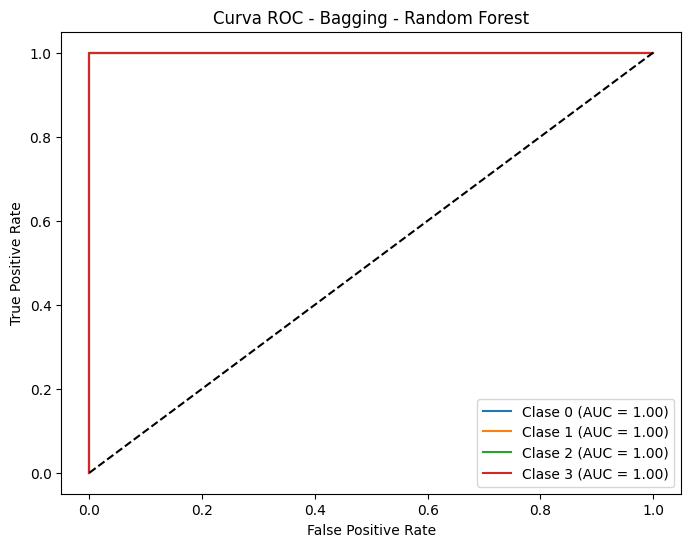

<Figure size 600x600 with 0 Axes>

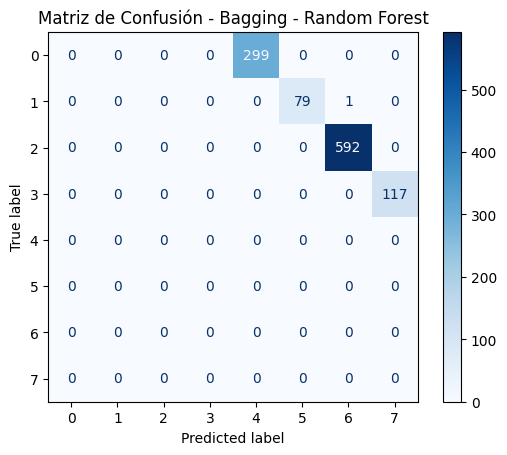

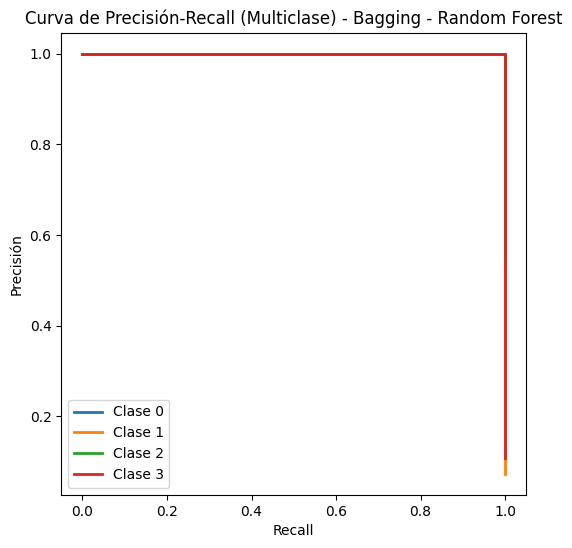

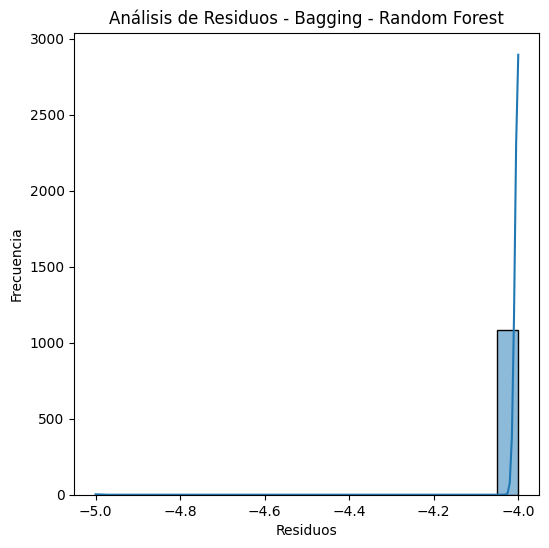

‚ö† Advertencia: El modelo Bagging - Random Forest no tiene atributo 'feature_importances_' ni 'coef_'.
‚ö† Advertencia: El modelo Bagging - Random Forest no es un √°rbol de decisi√≥n.

 Evaluando Gradient Boosting...



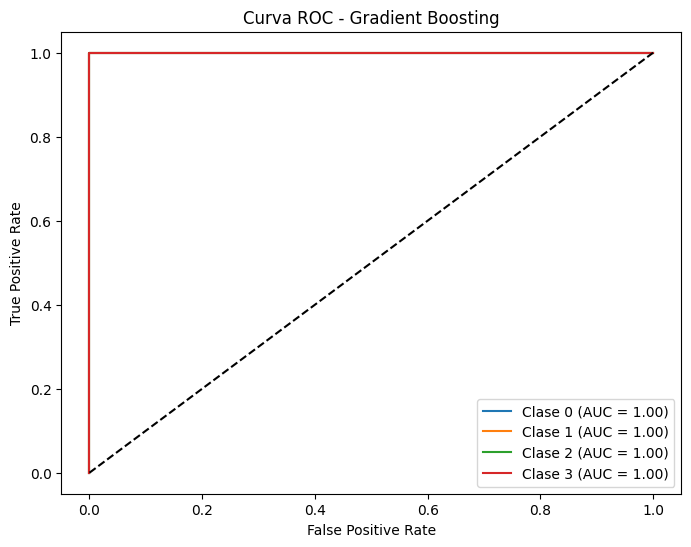

<Figure size 600x600 with 0 Axes>

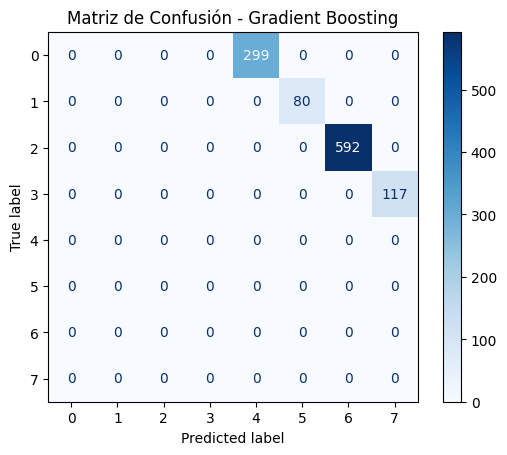

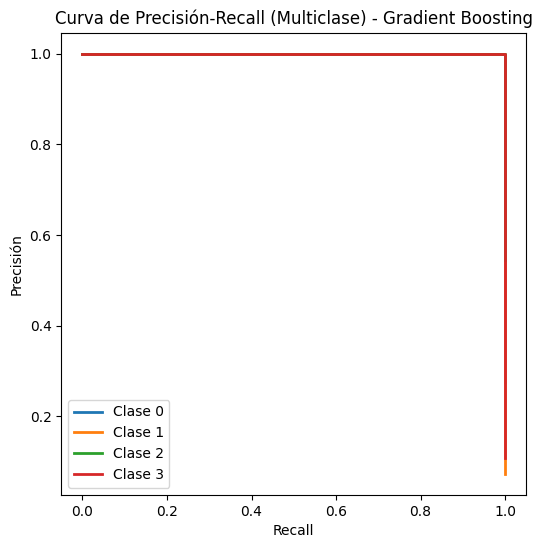

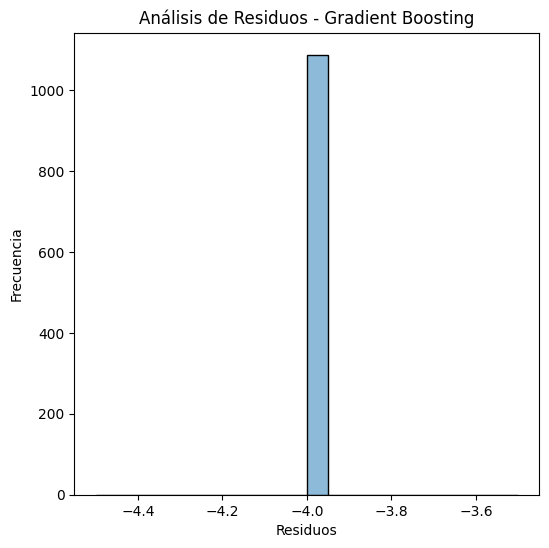

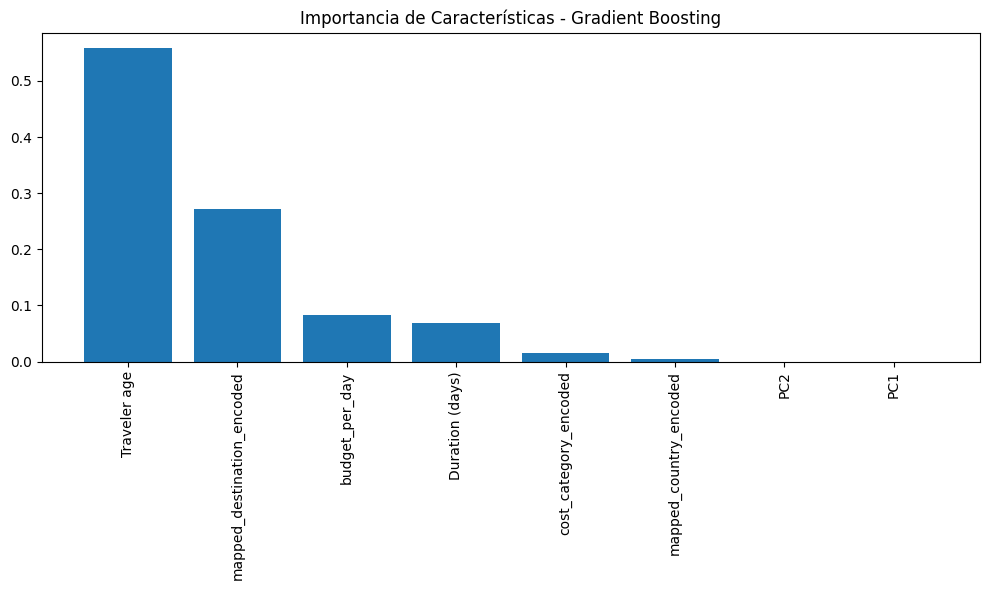

‚ö† Advertencia: El modelo Gradient Boosting no es un √°rbol de decisi√≥n.

 Evaluando Stacking...



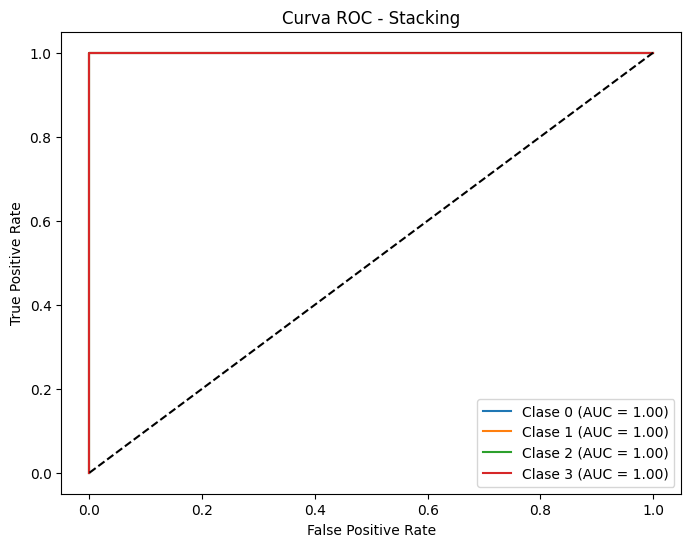

<Figure size 600x600 with 0 Axes>

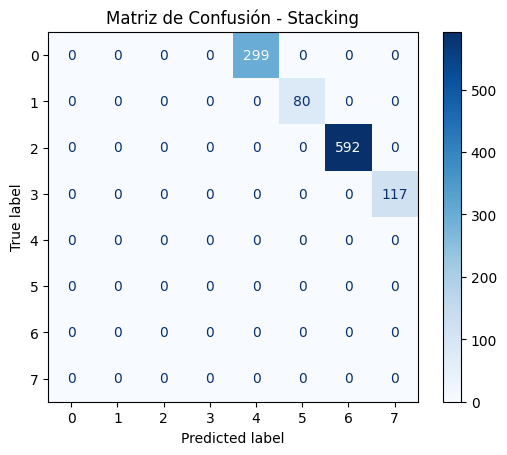

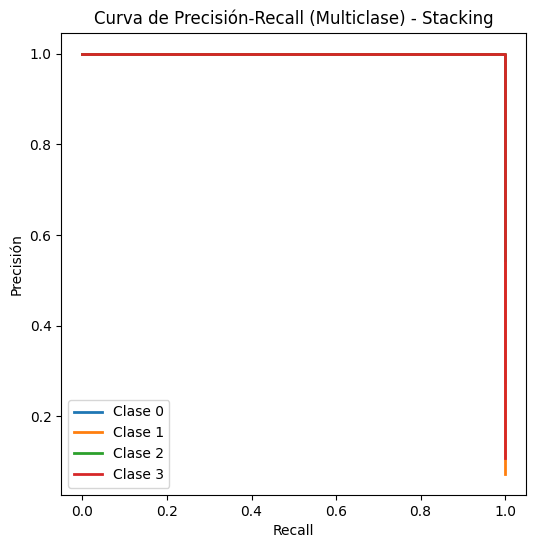

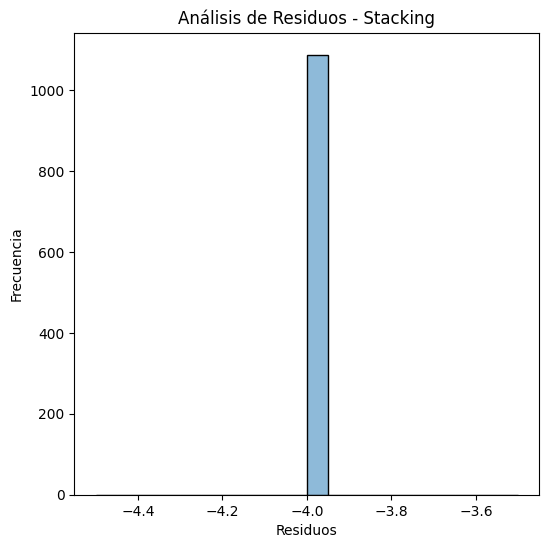

‚ö† Advertencia: El modelo Stacking no tiene atributo 'feature_importances_' ni 'coef_'.
‚ö† Advertencia: El modelo Stacking no es un √°rbol de decisi√≥n.

 Evaluando AdaBoost...



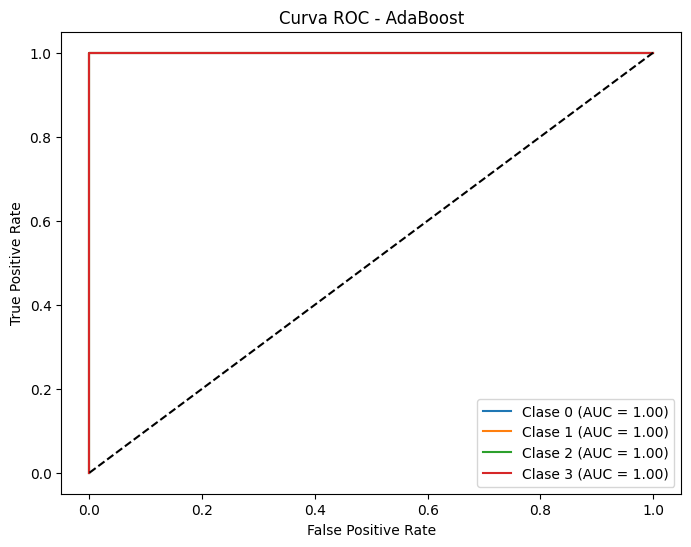

<Figure size 600x600 with 0 Axes>

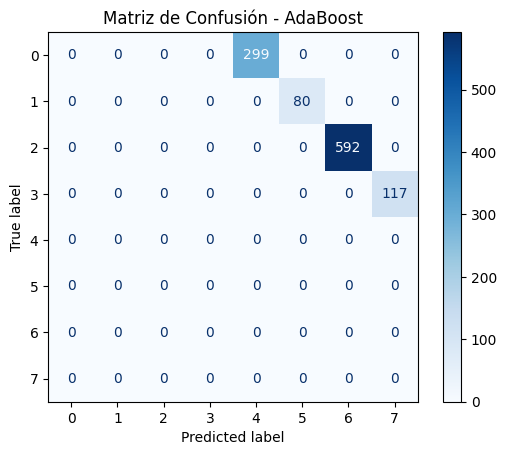

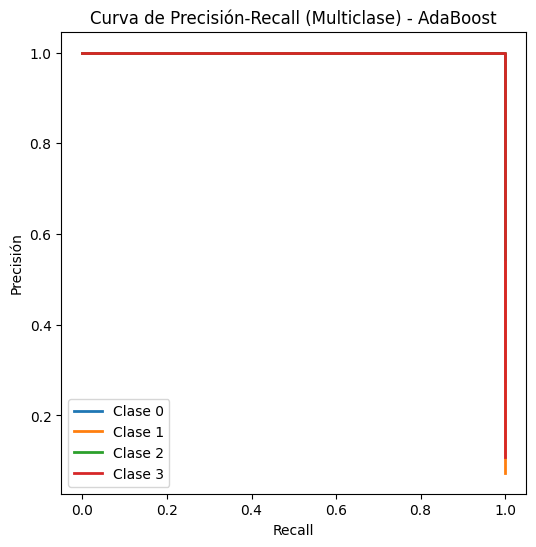

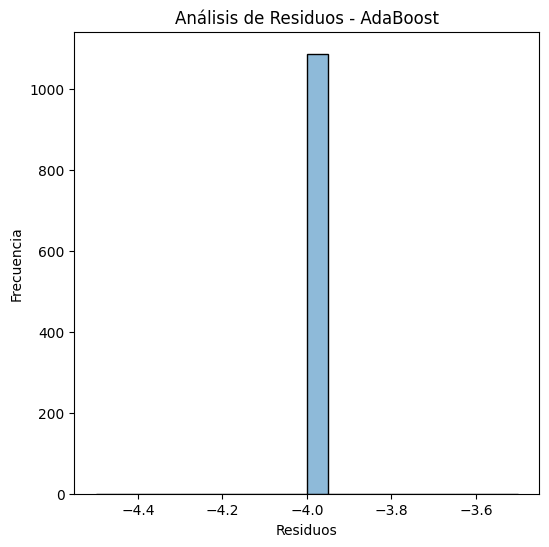

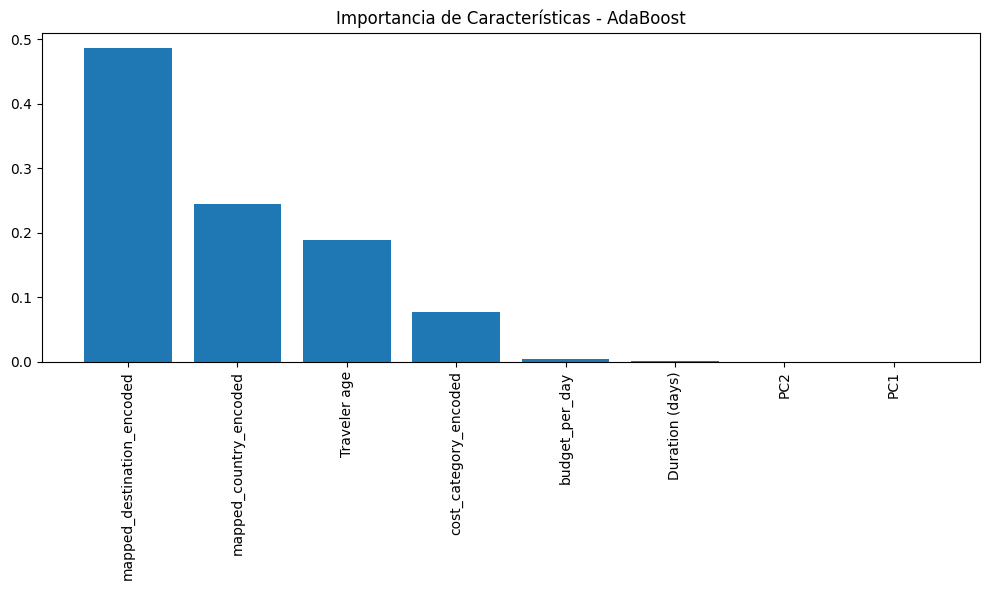

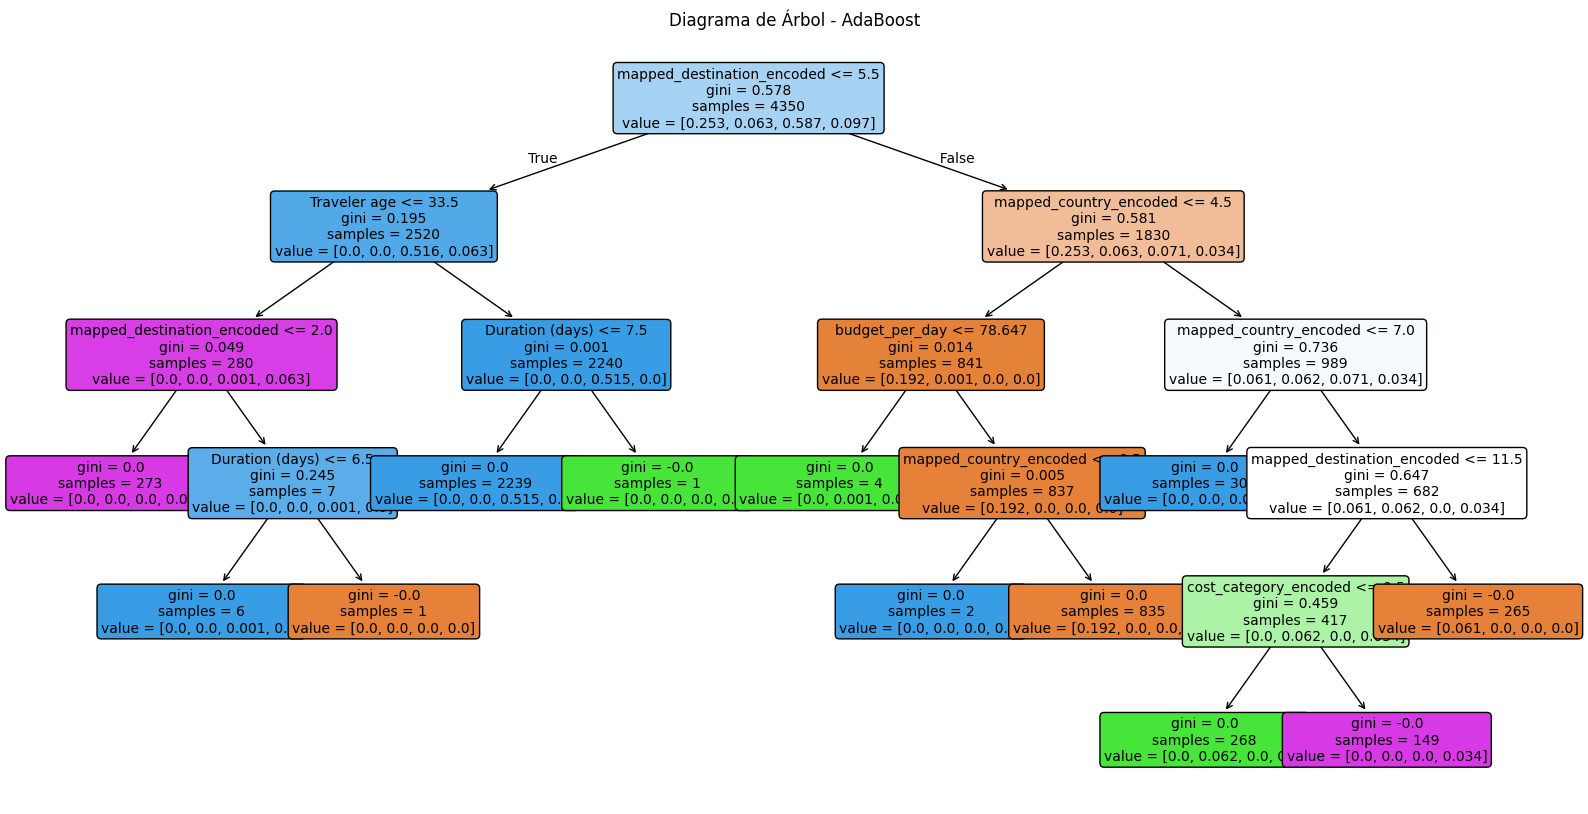


 Evaluando LightGBM...



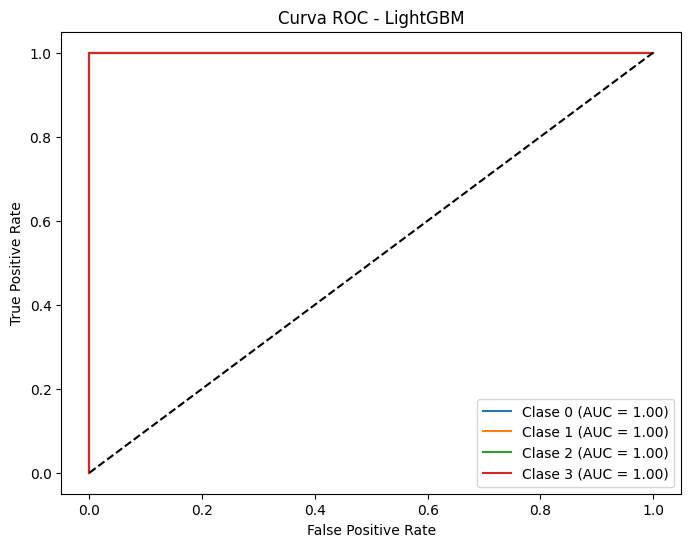

<Figure size 600x600 with 0 Axes>

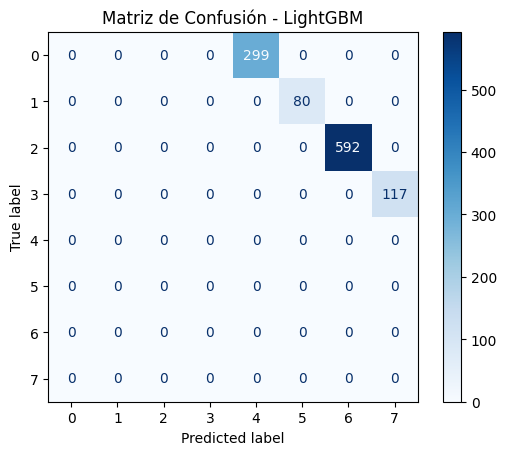

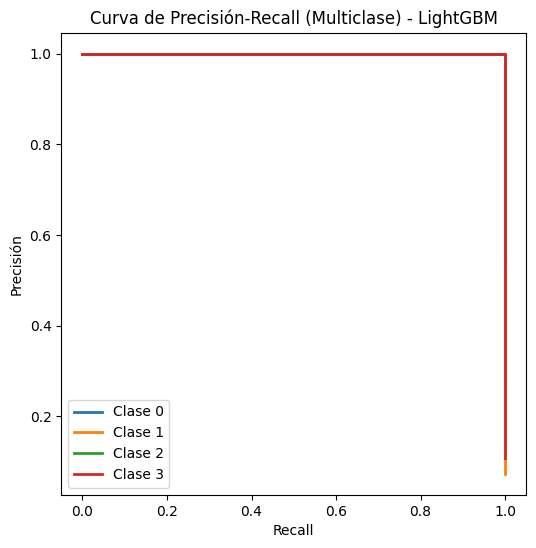

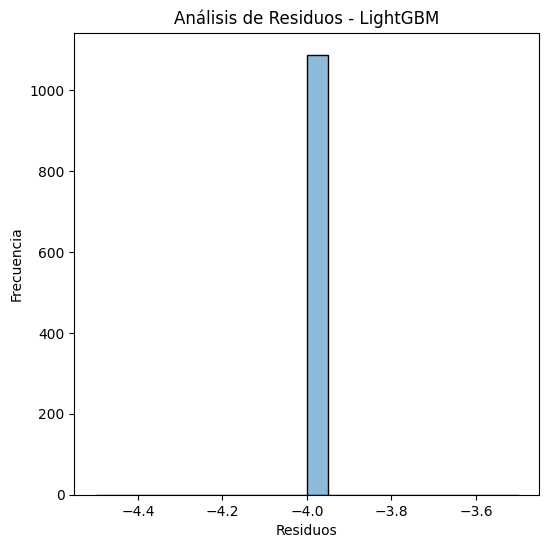

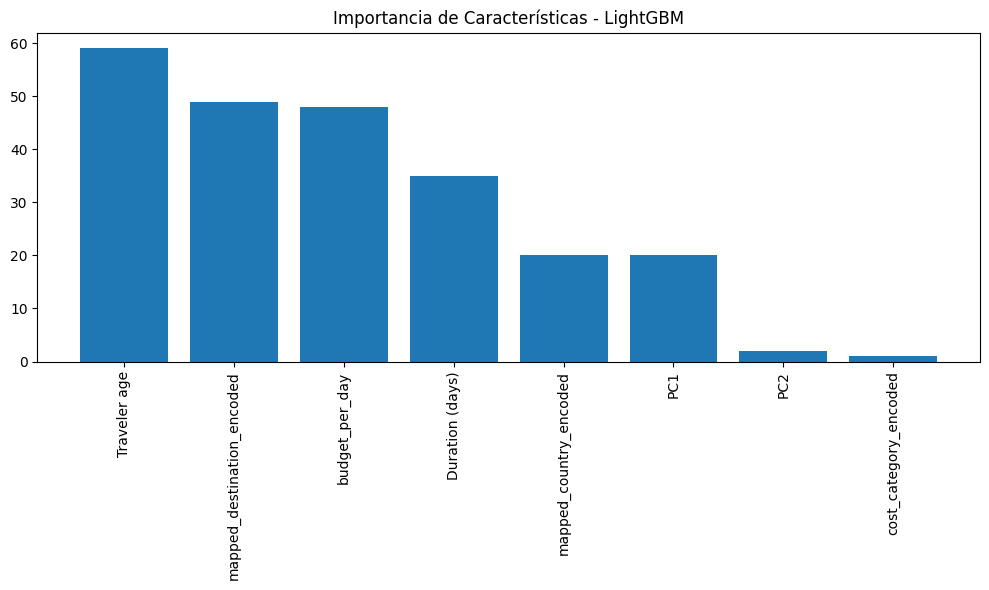

‚ö† Advertencia: El modelo LightGBM no es un √°rbol de decisi√≥n.


In [144]:
for name, model in modelos.items():
    print(f"\n Evaluando {name}...\n")

    # Hacer predicciones
    y_pred = model.predict(X_test)
    y_pred = convert_predictions_to_numeric(y_pred, label_encoder)  # Asegurar que sean num√©ricas

    # Graficar m√©tricas
    plot_roc_curve(model, X_test, y_test_encoded, name)
    plot_confusion_matrix(model, X_test, y_test_encoded, name)
    plot_precision_recall_curve_multiclass(model, X_test, y_test_encoded, name)
    plot_residual_analysis(model, X_test, y_test_encoded, name, label_encoder)
    plot_feature_importance(model, X_test.columns, name)

    # Si el modelo es basado en √°rboles, graficar su estructura
    if hasattr(model, "estimators_") or isinstance(model, lgb.LGBMClassifier):
        plot_decision_tree(model, X_test.columns, name)


# Avance 5: Modelo Final - Evaluaci√≥n y Selecci√≥n del Mejor Modelo

## Resumen del Avance
En esta fase se han desarrollado cinco modelos de ensamble, aplicando estrategias tanto homog√©neas como heterog√©neas. Se han utilizado los mejores modelos individuales de la fase previa para la construcci√≥n de modelos m√°s robustos.Uno de los principales desaf√≠os encontrados fue el sobreajuste de los modelos, lo que sugiere que el problema en s√≠ podr√≠a ser relativamente sencillo para los algoritmos utilizados. Dado que la tarea se centra en recomendaciones, la estructura de los datos y las relaciones entre variables parecen haber sido captadas con facilidad por los modelos, resultando en m√©tricas de desempe√±o perfectas en los conjuntos de prueba. Para abordar esto, se probaron ajustes en los hiperpar√°metros y t√©cnicas de regularizaci√≥n. Sin embargo, otro factor limitante fue el tiempo de entrenamiento en ciertos modelos, como Stacking, lo que llev√≥ a explorar alternativas m√°s eficientes como LightGBM.
  

## Modelos de Ensamble Evaluados
- Bagging - Random Forest (Estrategia homog√©nea)  
- Gradient Boosting (Estrategia homog√©nea)  
- Stacking (Estrategia heterog√©nea)  
- AdaBoost (Estrategia homog√©nea)  
- LightGBM (Estrategia homog√©nea, alternativa a Gradient Boosting)  

## Comparaci√≥n de Modelos
A continuaci√≥n, se presenta una tabla comparativa con las m√©tricas principales de desempe√±o.  
Los modelos han sido ordenados seg√∫n su precisi√≥n y tiempo de entrenamiento para evaluar tanto la calidad del modelo como su eficiencia computacional.

| Modelo                     | Accuracy | Precisi√≥n Promedio | Recall Promedio | F1-Score Promedio | Tiempo de Entrenamiento (s) |
|----------------------------|----------|--------------------|-----------------|-------------------|----------------------------|
| Bagging - Random Forest    | 0.999    | 0.999              | 0.999           | 0.999             | 0.217                      |
| Gradient Boosting          | 1.000    | 1.000              | 1.000           | 1.000             | 0.048                      |
| Stacking                   | 1.000    | 1.000              | 1.000           | 1.000             | 0.074                      |
| AdaBoost                   | 1.000    | 1.000              | 1.000           | 1.000             | 0.041                      |
| LightGBM                   | 1.000    | 1.000              | 1.000           | 1.000             | 0.041                      |

### Observaciones
- Todos los modelos presentan un desempe√±o perfecto, lo que podr√≠a indicar sobreajuste.  
- LightGBM y AdaBoost han sido los m√°s eficientes en t√©rminos de tiempo de entrenamiento.  
- Bagging - Random Forest es el modelo con mayor costo computacional.  
- Stacking logra un desempe√±o √≥ptimo, pero con un mayor tiempo de procesamiento.  

## Evaluaci√≥n Gr√°fica
Se han generado diferentes gr√°ficos para evaluar el comportamiento de los modelos:

1. Curva ROC  
   Todas las curvas ROC muestran un √°rea bajo la curva (AUC) de 1.00, indicando una separaci√≥n perfecta entre clases.  

2. Matriz de Confusi√≥n  
   Se observa que todos los modelos logran predecir sin errores en las clases observadas.  

3. Curva de Precisi√≥n-Recall  
   La relaci√≥n entre precisi√≥n y recall confirma un rendimiento ideal.  

4. An√°lisis de Residuos  
   No se presentan errores significativos en las predicciones.  

5. Importancia de Caracter√≠sticas  
   Los modelos basados en √°rboles identifican como variables m√°s relevantes:
  
- Edad del viajero
- Destino del viaje codificado
- Pa√≠s de destino codificado
- Costo del viaje categorizado
- Duraci√≥n del viaje  


## Selecci√≥n del Modelo Final y Consideraciones de Negocio

### Criterios de Selecci√≥n
Para determinar el mejor modelo, se consideraron los siguientes aspectos:
- Precisi√≥n del modelo  
- Eficiencia computacional  
- Capacidad de generalizaci√≥n  
- Escalabilidad y compatibilidad con APIs  
- Facilidad de integraci√≥n en un sistema productivo  

### Modelo Seleccionado: LightGBM
El modelo LightGBM ha sido seleccionado debido a los siguientes factores:

1. Alto Desempe√±o  
   Mantiene un accuracy perfecto en las pruebas realizadas.  
   Se recomienda validarlo con datos en producci√≥n para verificar su capacidad de generalizaci√≥n.  

2. Eficiencia Computacional  
   Menor tiempo de entrenamiento en comparaci√≥n con otros modelos como Stacking o Random Forest.  
   Puede ser entrenado y desplegado en entornos con restricciones de hardware sin afectar el rendimiento.  

3. Escalabilidad y Conectividad con APIs  
   Ideal para integraciones en plataformas SaaS, donde se pueden recibir datos en tiempo real y generar predicciones de forma din√°mica.  
   Compatible con implementaciones en la nube (AWS, GCP, Azure), permitiendo escalar a grandes vol√∫menes de datos sin impacto en la latencia.  
   Se puede conectar f√°cilmente con APIs de terceros, por ejemplo, para:
  - Recomendar alojamiento y transporte en plataformas de viaje  
  - Predecir costos de viaje en tiempo real seg√∫n la ubicaci√≥n y preferencias del usuario  
  - Optimizar rutas de transporte y tiempos de viaje  

4. Flexibilidad en Ajuste de Hiperpar√°metros  
   Permite ajustes en profundidad del √°rbol, tasa de aprendizaje y n√∫mero de iteraciones, lo que puede mejorar la generalizaci√≥n en producci√≥n.  


## Conclusi√≥n Final

LightGBM es el modelo √≥ptimo para esta tarea debido a su rendimiento, eficiencia y capacidad de escalabilidad. Su implementaci√≥n permitir√≠a automatizar y mejorar la recomendaci√≥n de transporte y alojamiento, facilitando su integraci√≥n con plataformas de viajes y APIs en la nube.  

Se recomienda seguir el plan de pruebas para garantizar su √©xito en un entorno de producci√≥n.

Despu√©s de evaluar distintas estrategias, LightGBM ha sido seleccionado como el modelo final debido a su equilibrio entre precisi√≥n y velocidad de entrenamiento. Su arquitectura optimizada permite manejar grandes vol√∫menes de datos sin comprometer el rendimiento, lo que lo convierte en una opci√≥n viable para su implementaci√≥n en producci√≥n.

En un entorno real, la integraci√≥n de este modelo permitir√≠a generar recomendaciones personalizadas en tiempo real con un bajo costo computacional. Su capacidad de escalar y adaptarse a nuevos datos facilitar√° su conexi√≥n con APIs de servicios de viajes y reservas, mejorando la eficiencia en la planificaci√≥n de itinerarios. Adem√°s, su implementaci√≥n en plataformas digitales, como asistentes virtuales o chatbots, ofrecer√≠a una experiencia m√°s din√°mica e interactiva para los usuarios.

Para garantizar su efectividad en producci√≥n, es esencial contar con un sistema de monitoreo continuo que permita detectar posibles desviaciones en el rendimiento y ajustar los par√°metros conforme evolucionen las tendencias de viaje. A futuro, una posible mejora ser√≠a incorporar mecanismos de aprendizaje adaptativo o aprendizaje por refuerzo, permitiendo que el sistema no solo haga predicciones, sino que aprenda de la retroalimentaci√≥n de los usuarios y optimice sus recomendaciones de manera progresiva.

En t√©rminos de escalabilidad, este modelo representa un paso s√≥lido hacia la construcci√≥n de un Agente de IA que pueda operar de manera aut√≥noma, ofreciendo respuestas personalizadas y optimizando procesos de b√∫squeda y reserva. A largo plazo, la capacidad del modelo para integrarse con fuentes de datos en tiempo real y mejorar continuamente sus predicciones asegurar√° su relevancia en un entorno din√°mico y en constante cambio.

## Qu√© esperar de llevar el modelo en Producci√≥n:

### Pruebas necesarias antes del despliegue:
- **Evaluaci√≥n con datos en producci√≥n** para verificar que no haya p√©rdida de precisi√≥n en datos no vistos.  
- **Pruebas A/B** comparando las predicciones del modelo con las elecciones reales de los usuarios.  
- **Monitoreo del rendimiento** en producci√≥n para detectar posibles desviaciones en la precisi√≥n y ajustar hiperpar√°metros en caso necesario.  
- **Optimizaci√≥n de tiempos de respuesta** en APIs para garantizar predicciones en tiempo real.  

### Ajustes esperados en producci√≥n:
- **Regularizaci√≥n** para evitar sobreajuste.  
- **Reducci√≥n de dimensiones** si se detecta que ciertas variables no aportan valor en la predicci√≥n.  
- **Ajuste de hiperpar√°metros** mediante t√©cnicas de optimizaci√≥n como Grid Search o Bayesian Optimization.  

## Pr√≥ximos Pasos: Desarrollo del Agente de IA

Con el modelo funcionando en producci√≥n, el siguiente paso ser√≠a integrar su funcionalidad dentro de un Agente de Inteligencia Artificial que pueda interactuar din√°micamente con los usuarios. Las siguientes estrategias pueden ser clave para la evoluci√≥n del proyecto:

1. **Desarrollo de un Chatbot con IA**  
   - Integraci√≥n con WhatsApp, Telegram o asistentes virtuales.  
   - Respuesta a consultas sobre transporte y alojamiento en tiempo real.  
   - Recomendaciones basadas en predicciones del modelo.  

2. **Conexi√≥n con APIs Externas**  
   - Integraci√≥n con plataformas de reservas de hoteles y aerol√≠neas.  
   - Obtenci√≥n de datos en tiempo real sobre precios y disponibilidad.  
   - Incorporaci√≥n de factores externos como clima y eventos locales en las predicciones.  

3. **Automatizaci√≥n de Procesos con IA**  
   - Predicci√≥n autom√°tica de costos de viaje en plataformas de e-commerce.  
   - Optimizaci√≥n de rutas de transporte seg√∫n datos hist√≥ricos y tr√°fico en tiempo real.  
   - Implementaci√≥n de un sistema de alertas para notificar a los usuarios sobre cambios en precios o disponibilidad.  

4. **Monitoreo y Aprendizaje Continuo**  
   - Recolecci√≥n de feedback de los usuarios para mejorar el modelo.  
   - Ajuste din√°mico de los par√°metros del modelo seg√∫n nuevos patrones de comportamiento.  
   - Incorporaci√≥n de modelos de Reinforcement Learning para mejorar la toma de decisiones en tiempo real.  

